# 축구선수 유망주 예측

## 1. 데이터 로드 및 탐색

In [100]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import MaxNLocator

# 시각화 스타일 설정
#sns.set_palette('husl')
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [101]:
# 데이터 로드
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print(f'Train 데이터 크기: {train.shape}')
print(f'Test 데이터 크기: {test.shape}')

# Train과 Test 데이터 합치기 (분석용)
all_data = pd.concat([train, test], ignore_index=True)
print(f'전체 데이터 크기 (Train + Test): {all_data.shape}')

Train 데이터 크기: (3019, 66)
Test 데이터 크기: (1626, 65)
전체 데이터 크기 (Train + Test): (4645, 66)


In [102]:
# 데이터 확인
print('=== 전체 데이터 (Train + Test) 상위 10개 ===' )
display(all_data.head(10))

print('\n=== Test 데이터 상위 10개 ===')
display(test.head(10))

=== 전체 데이터 (Train + Test) 상위 10개 ===


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0.0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0.0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0.0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0.0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0.0
5,TRAIN_0005,18,177,73,LB,Left,Medium,Medium,5.0725,1.1842,...,2.7397,3.3784,4.3662,3.5714,4.3662,4.5714,4.3056,4.5714,0.625,0.0
6,TRAIN_0006,20,196,82,GK,Right,Medium,Medium,3.6232,5.0000,...,0.8219,0.5405,0.5634,0.5714,0.5634,0.5714,0.5556,0.5714,5.625,0.0
7,TRAIN_0007,21,189,64,CDM,Right,Medium,Medium,4.0580,3.5526,...,5.4795,5.2703,6.0563,6.1429,6.0563,6.1429,6.1111,6.1429,0.750,0.0
8,TRAIN_0008,19,174,60,RB,Right,Medium,Medium,4.0580,1.5789,...,3.1507,3.7838,4.5070,3.4286,4.5070,4.5714,3.8889,4.5714,0.875,0.0
9,TRAIN_0009,18,183,75,CB,Right,Medium,Medium,4.4928,1.4474,...,3.6986,3.6486,4.5070,4.7143,4.5070,4.8571,5.2778,4.8571,1.000,1.0



=== Test 데이터 상위 10개 ===


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,TEST_0000,17,184,75,GK,Right,Medium,Medium,3.7681,5.3947,...,0.1351,0.5479,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.500
1,TEST_0001,19,188,80,ST,Right,High,Medium,4.9275,4.8684,...,4.1892,3.4247,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.750
2,TEST_0002,17,173,68,CAM,Right,High,High,6.9565,6.3158,...,8.3784,8.6301,8.3784,8.3099,8.2857,8.3099,8.1429,7.0833,8.1429,1.125
3,TEST_0003,20,178,69,CAM,Right,Medium,Medium,6.8116,6.4474,...,7.1622,6.7123,7.1622,5.6338,5.1429,5.6338,5.2857,4.1667,5.2857,1.375
4,TEST_0004,19,176,72,CAM,Left,High,Low,5.5072,4.7368,...,5.9459,5.4795,5.9459,5.0704,4.7143,5.0704,4.8571,4.0278,4.8571,0.750
5,TEST_0005,19,170,70,RWB,Right,High,Medium,6.0870,1.7105,...,4.8649,4.3836,4.8649,5.4930,4.8571,5.4930,5.5714,4.8611,5.5714,1.000
6,TEST_0006,20,186,82,ST,Right,High,Low,4.0580,6.4474,...,5.0000,4.5205,5.0000,3.3803,3.0000,3.3803,3.2857,3.0556,3.2857,0.625
7,TEST_0007,20,177,66,CAM,Right,High,Medium,5.0725,4.7368,...,6.3514,6.4384,6.3514,6.1972,6.0000,6.1972,6.0000,5.1389,6.0000,0.875
8,TEST_0008,20,193,83,CB,Right,Medium,Medium,2.6087,1.5789,...,2.8378,3.0137,2.8378,4.2254,4.4286,4.2254,4.7143,5.4167,4.7143,1.000
9,TEST_0009,19,201,84,CB,Right,Medium,Medium,5.2174,1.3158,...,3.7838,3.9726,3.7838,5.7746,5.7143,5.7746,6.1429,6.5278,6.1429,0.750


## 2. 데이터 설명 및 분석 (EDA)

### 1. 데이터 설명

이 데이터셋은 축구 선수들의 다양한 능력치와 신체 정보 등을 바탕으로 유망주(`Prospect`) 여부를 예측하기 위한 것으로 보입니다.

#### 주요 컬럼 정보:
- **ID**: 각 선수의 고유 식별자 (예: TRAIN_0000)
- **Personal Attributes**:
    - `Age`: 나이
    - `Height`: 키 (cm)
    - `Weight`: 몸무게 (kg)
    - `Position`: 포지션 (예: CB, ST, RB 등)
    - `PreferredFoot`: 주발 (Right, Left)
- **Work Rates**:
    - `AttackingWorkRate`: 공격 활동량 (Low, Medium, High)
    - `DefensiveWorkRate`: 수비 활동량
- **Skill Ratings (Total & Specific)**:
    - `PaceTotal`, `ShootingTotal`, `PassingTotal`, `DribblingTotal`, `DefendingTotal`, `PhysicalityTotal`: 각 분야별 종합 점수
    - `Crossing`, `Finishing`, `HeadingAccuracy`, `ShortPassing`, `Volleys`, `Dribbling`, 등 세부 기술 점수
- **Movement & Power**:
    - `Acceleration`, `SprintSpeed`, `Agility`, `Reactions`, `Balance`
    - `ShotPower`, `Jumping`, `Stamina`, `Strength`, `LongShots`
- **Mentality & Defending**:
    - `Aggression`, `Interceptions`, `Positioning`, `Vision`, `Penalties`, `Composure`
    - `Marking`, `StandingTackle`, `SlidingTackle`
- **Goalkeeping**:
    - `GKDiving`, `GKHandling`, `GKKicking`, `GKPositioning`, `GKReflexes`
- **Ratings by Position**:
    - `STRating`, `LWRating`, `LFRating`, `CFRating`, etc. (각 포지션별 평점)
- **Target**:
    - `Prospect`: 유망주 여부 (0 또는 1로 추정, 타겟 변수)


In [103]:
# 데이터 정보 확인
print('=== Train 데이터 정보 ===')
train.info()

=== Train 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   object 
 5   PreferredFoot      3019 non-null   object 
 6   AttackingWorkRate  3019 non-null   object 
 7   DefensiveWorkRate  3019 non-null   object 
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  Hea

In [104]:
# 기술 통계량
print('=== Train 데이터 기술 통계량 ===')
train.describe()

=== Train 데이터 기술 통계량 ===


,Age,Height,Weight,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
count,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,...,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.000000,3019.00000,3019.000000,3019.000000,3019.000000
mean,19.632329,180.892348,73.081153,5.760521,4.292595,4.080918,4.708363,3.816096,4.549276,4.371896,...,4.748056,4.961191,4.874432,4.508399,4.874432,4.852789,4.33072,4.852789,1.424188,0.361047
std,1.235638,6.800187,6.539758,1.298024,1.624982,1.301538,1.366596,2.029423,1.414989,1.790045,...,1.677262,1.814854,1.815744,1.809723,1.815744,1.877633,1.88076,1.877633,1.606925,0.480384
min,16.000000,160.000000,49.000000,0.724600,0.526300,0.000000,0.000000,0.000000,0.000000,0.113600,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000
25%,19.000000,176.000000,69.000000,4.927500,3.092100,3.235300,3.939400,1.842100,3.606600,3.295500,...,4.109600,4.459500,4.225400,3.571400,4.225400,4.000000,3.05560,4.000000,0.750000,0.000000
50%,20.000000,180.000000,73.000000,5.797100,4.605300,4.117600,4.848500,4.210500,4.590200,4.772700,...,5.068500,5.405400,5.211300,4.857100,5.211300,5.285700,4.58330,5.285700,0.875000,0.000000
75%,21.000000,185.500000,77.000000,6.666700,5.526300,5.000000,5.606100,5.526300,5.573800,5.681800,...,5.890400,6.081100,6.056300,5.857100,6.056300,6.142900,5.83330,6.142900,1.125000,1.000000
max,21.000000,204.000000,99.000000,9.710100,9.868400,8.235300,9.393900,8.684200,9.344300,8.522700,...,9.315100,9.189200,9.014100,9.142900,9.014100,9.142900,9.02780,9.142900,8.625000,1.000000


In [105]:
# 결측치 확인
print('=== Train 결측치 ===' )
print(train.isnull().sum())
print(f'\n결측치 비율(%):')
print((train.isnull().sum() / len(train) * 100).round(2))

=== Train 결측치 ===
ID          0
Age         0
Height      0
Weight      0
Position    0
           ..
LBRating    0
CBRating    0
RBRating    0
GKRating    0
Prospect    0
Length: 66, dtype: int64

결측치 비율(%):
ID          0.0
Age         0.0
Height      0.0
Weight      0.0
Position    0.0
           ... 
LBRating    0.0
CBRating    0.0
RBRating    0.0
GKRating    0.0
Prospect    0.0
Length: 66, dtype: float64


In [106]:
train = train[train['Position'] == 'GK']

# 확인
print("남은 포지션:", train['Position'].unique())
display(all_data.head(10))

print(f"총 컬럼 개수: {train.shape[0]}개")

남은 포지션: ['GK']


,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0.0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0.0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0.0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0.0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0.0
5,TRAIN_0005,18,177,73,LB,Left,Medium,Medium,5.0725,1.1842,...,2.7397,3.3784,4.3662,3.5714,4.3662,4.5714,4.3056,4.5714,0.625,0.0
6,TRAIN_0006,20,196,82,GK,Right,Medium,Medium,3.6232,5.0000,...,0.8219,0.5405,0.5634,0.5714,0.5634,0.5714,0.5556,0.5714,5.625,0.0
7,TRAIN_0007,21,189,64,CDM,Right,Medium,Medium,4.0580,3.5526,...,5.4795,5.2703,6.0563,6.1429,6.0563,6.1429,6.1111,6.1429,0.750,0.0
8,TRAIN_0008,19,174,60,RB,Right,Medium,Medium,4.0580,1.5789,...,3.1507,3.7838,4.5070,3.4286,4.5070,4.5714,3.8889,4.5714,0.875,0.0
9,TRAIN_0009,18,183,75,CB,Right,Medium,Medium,4.4928,1.4474,...,3.6986,3.6486,4.5070,4.7143,4.5070,4.8571,5.2778,4.8571,1.000,1.0


총 컬럼 개수: 314개


## 3. 컬럼별 데이터 분석 및 시각화

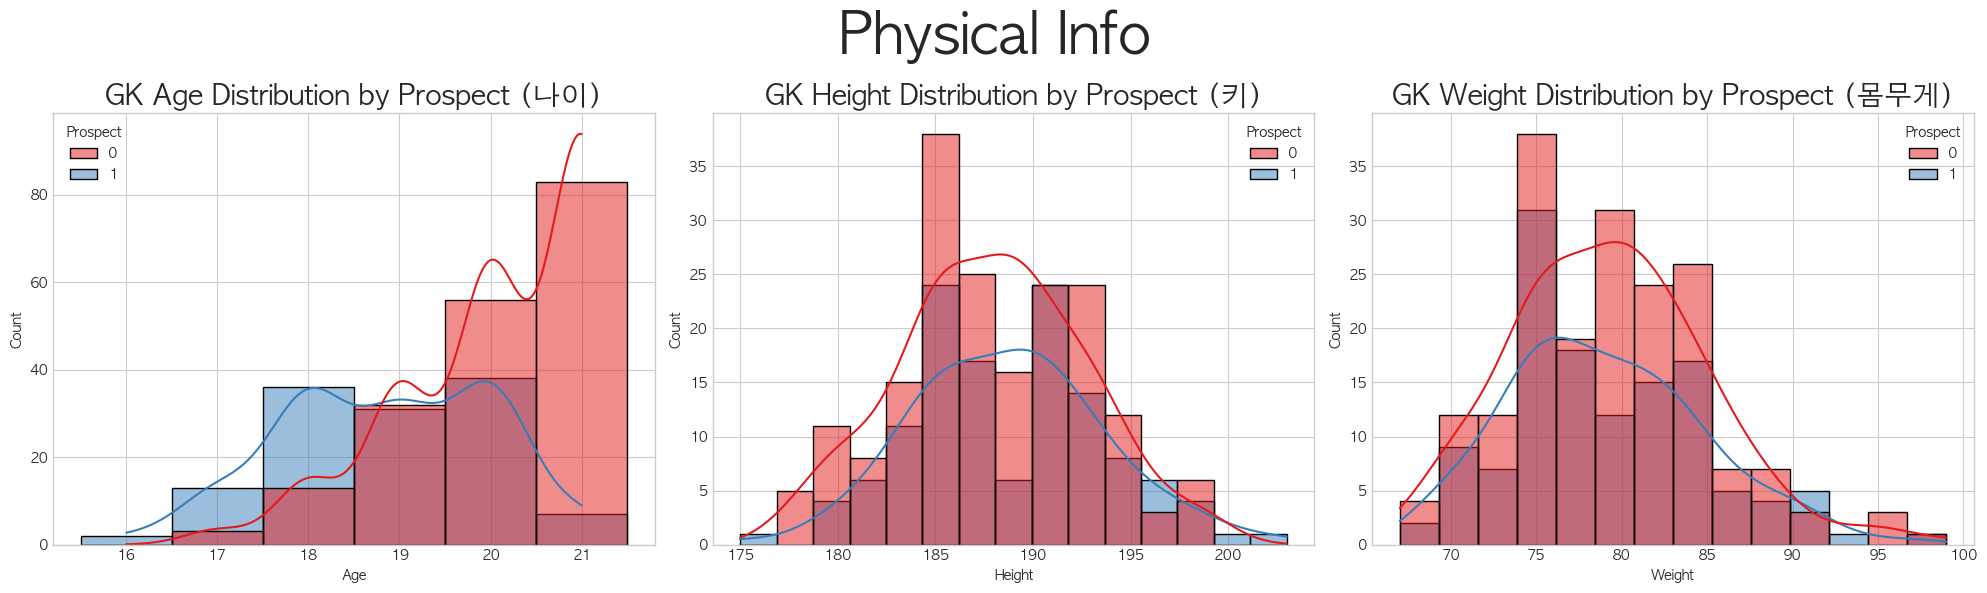

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 1. 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 도화지 준비
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Physical Info', fontsize=40, fontweight='bold')
# --- 첫 번째: 나이 (Age) ---
sns.histplot(
    data=train, 
    x='Age', 
    hue='Prospect',     # [수정] 0과 1로 쪼개기
    discrete=True, 
    kde=True, 
    ax=axes[0], 
    palette='Set1',     # [수정] 단색(color) 대신 두 가지 색(palette) 사용
    alpha=0.5           # [추가] 겹친 부분 보이게 투명도 조절
)
axes[0].set_title('GK Age Distribution by Prospect (나이)', fontsize=20) 
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

# --- 두 번째: 키 (Height) ---
sns.histplot(
    data=train, 
    x='Height', 
    hue='Prospect',     # [수정]
    kde=True, 
    ax=axes[1], 
    palette='Set1',     # [수정]
    alpha=0.5           # [추가]
)
axes[1].set_title('GK Height Distribution by Prospect (키)', fontsize=20)

# --- 세 번째: 몸무게 (Weight) ---
sns.histplot(
    data=train, 
    x='Weight', 
    hue='Prospect',     # [수정]
    kde=True, 
    ax=axes[2], 
    palette='Set1',     # [수정]
    alpha=0.5           # [추가]
)
axes[2].set_title('GK Weight Distribution by Prospect (몸무게)', fontsize=20)

plt.tight_layout()
plt.show()

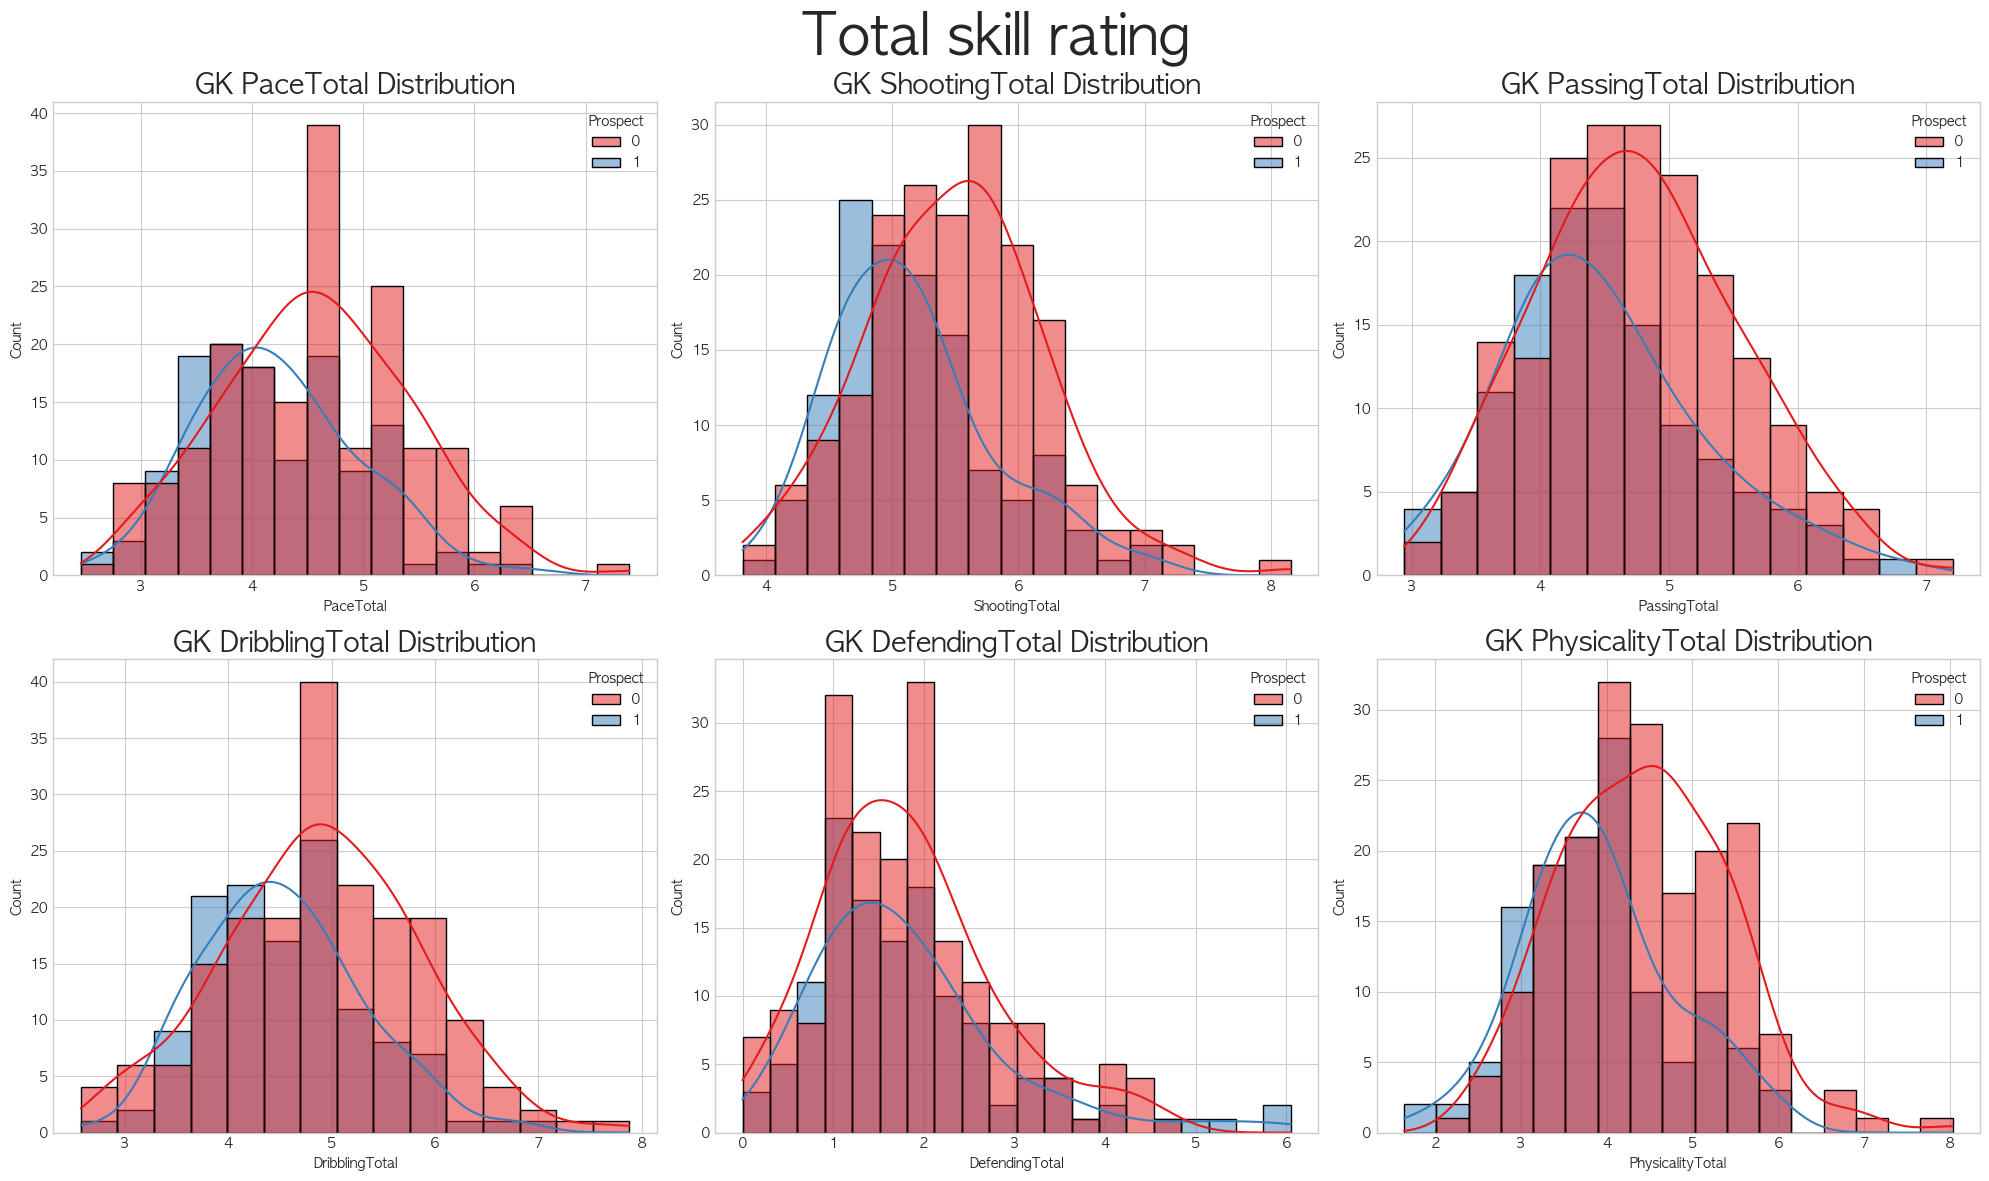

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 폰트 설정 (안전하게 포함)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 컬럼 이름 리스트
total_columns = [
    'PaceTotal',       # 속력
    'ShootingTotal',   # 슈팅
    'PassingTotal',    # 패스
    'DribblingTotal',  # 드리블
    'DefendingTotal',  # 수비
    'PhysicalityTotal' # 피지컬
]

# 3. 도화지 준비 (2줄 3칸)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()
fig.suptitle('Total skill rating', fontsize=40, fontweight='bold')
# 4. 반복문으로 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 5. 마무리
plt.tight_layout()
plt.show()

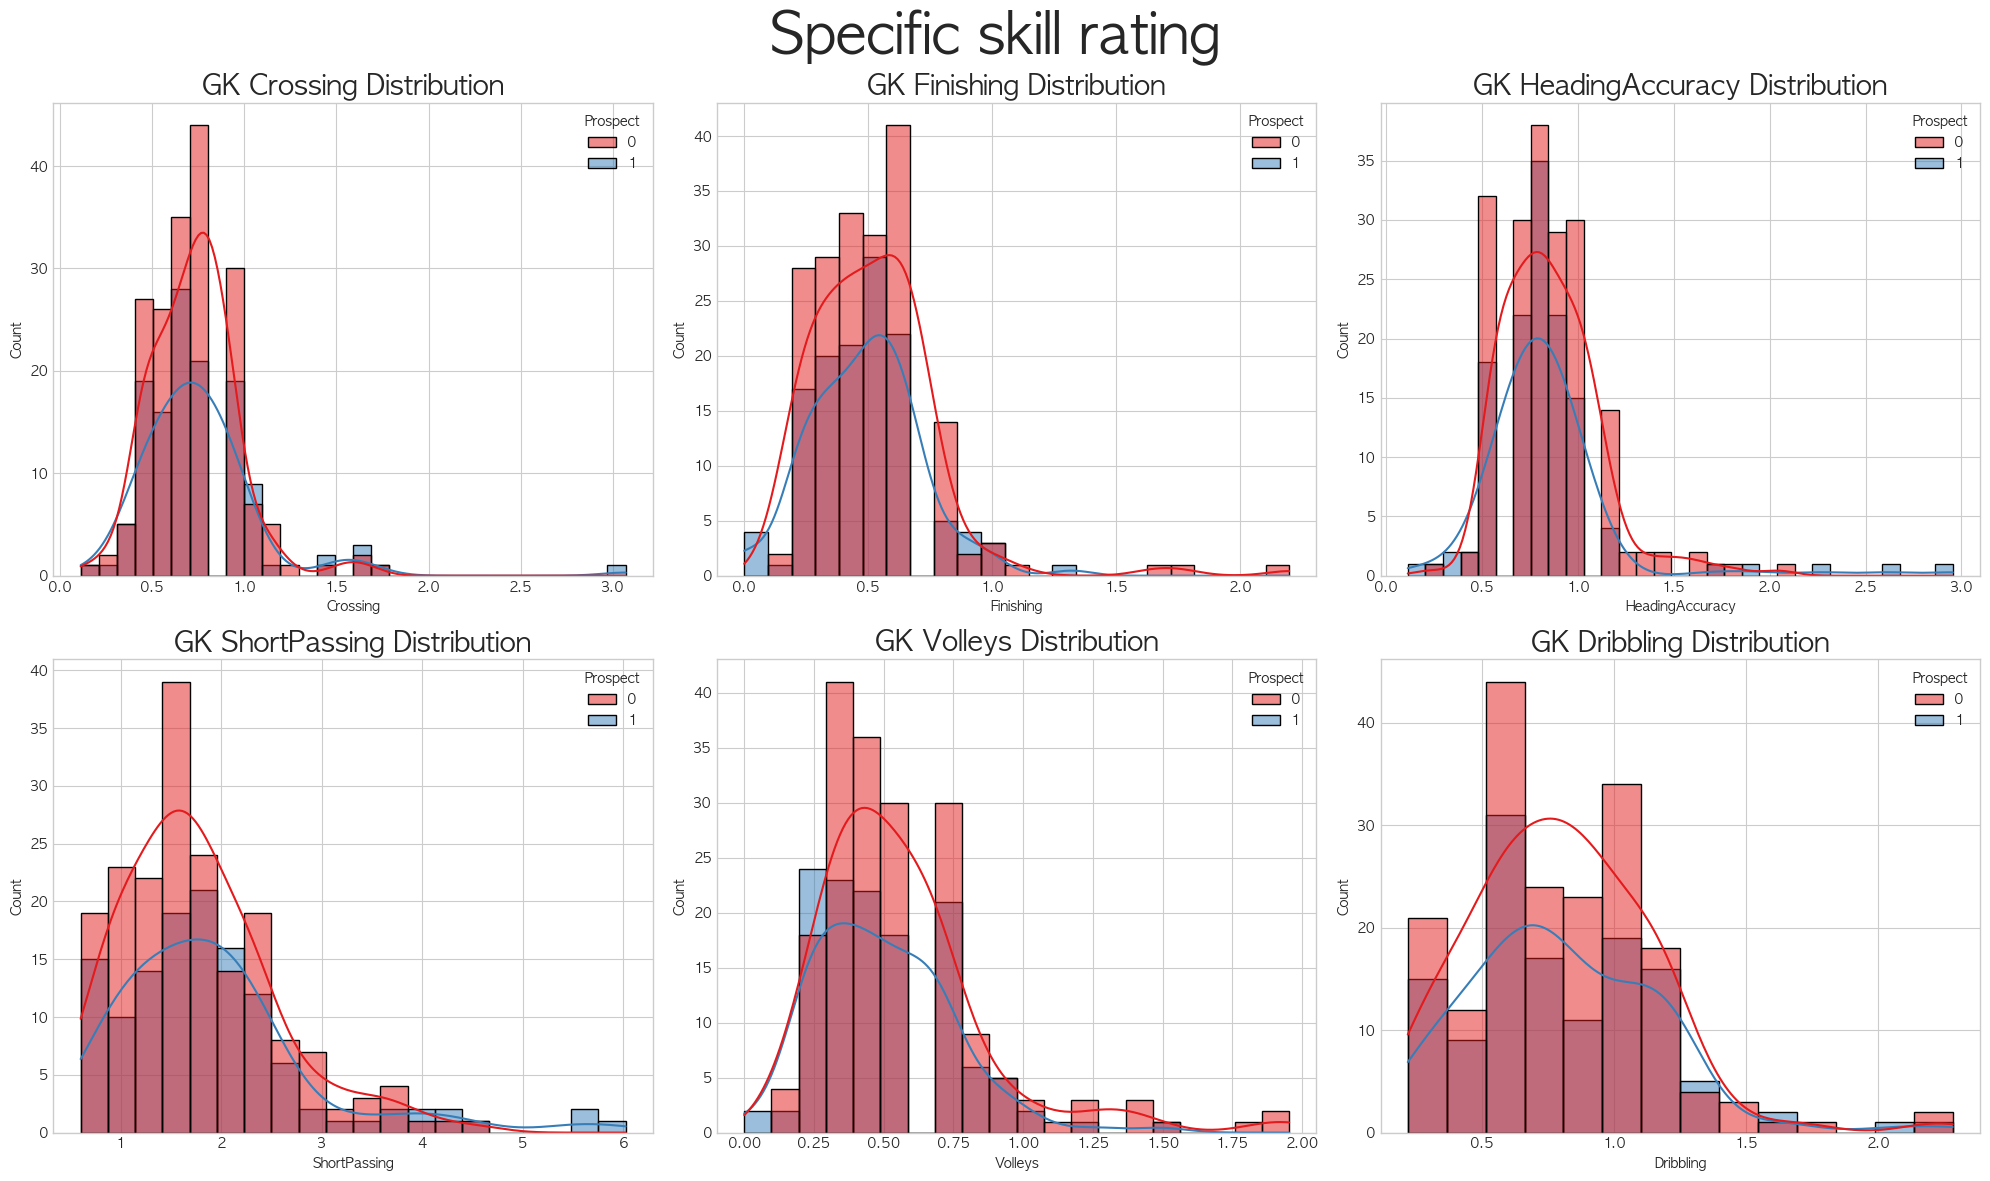

In [109]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Crossing',
   'Finishing',
   'HeadingAccuracy',
   'ShortPassing', 
   'Volleys', 
   'Dribbling'
]

# 2. 도화지 준비 (2줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(2, 3, figsize=(20, 12)) 
axes = axes.flatten() 
fig.suptitle('Specific skill rating', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

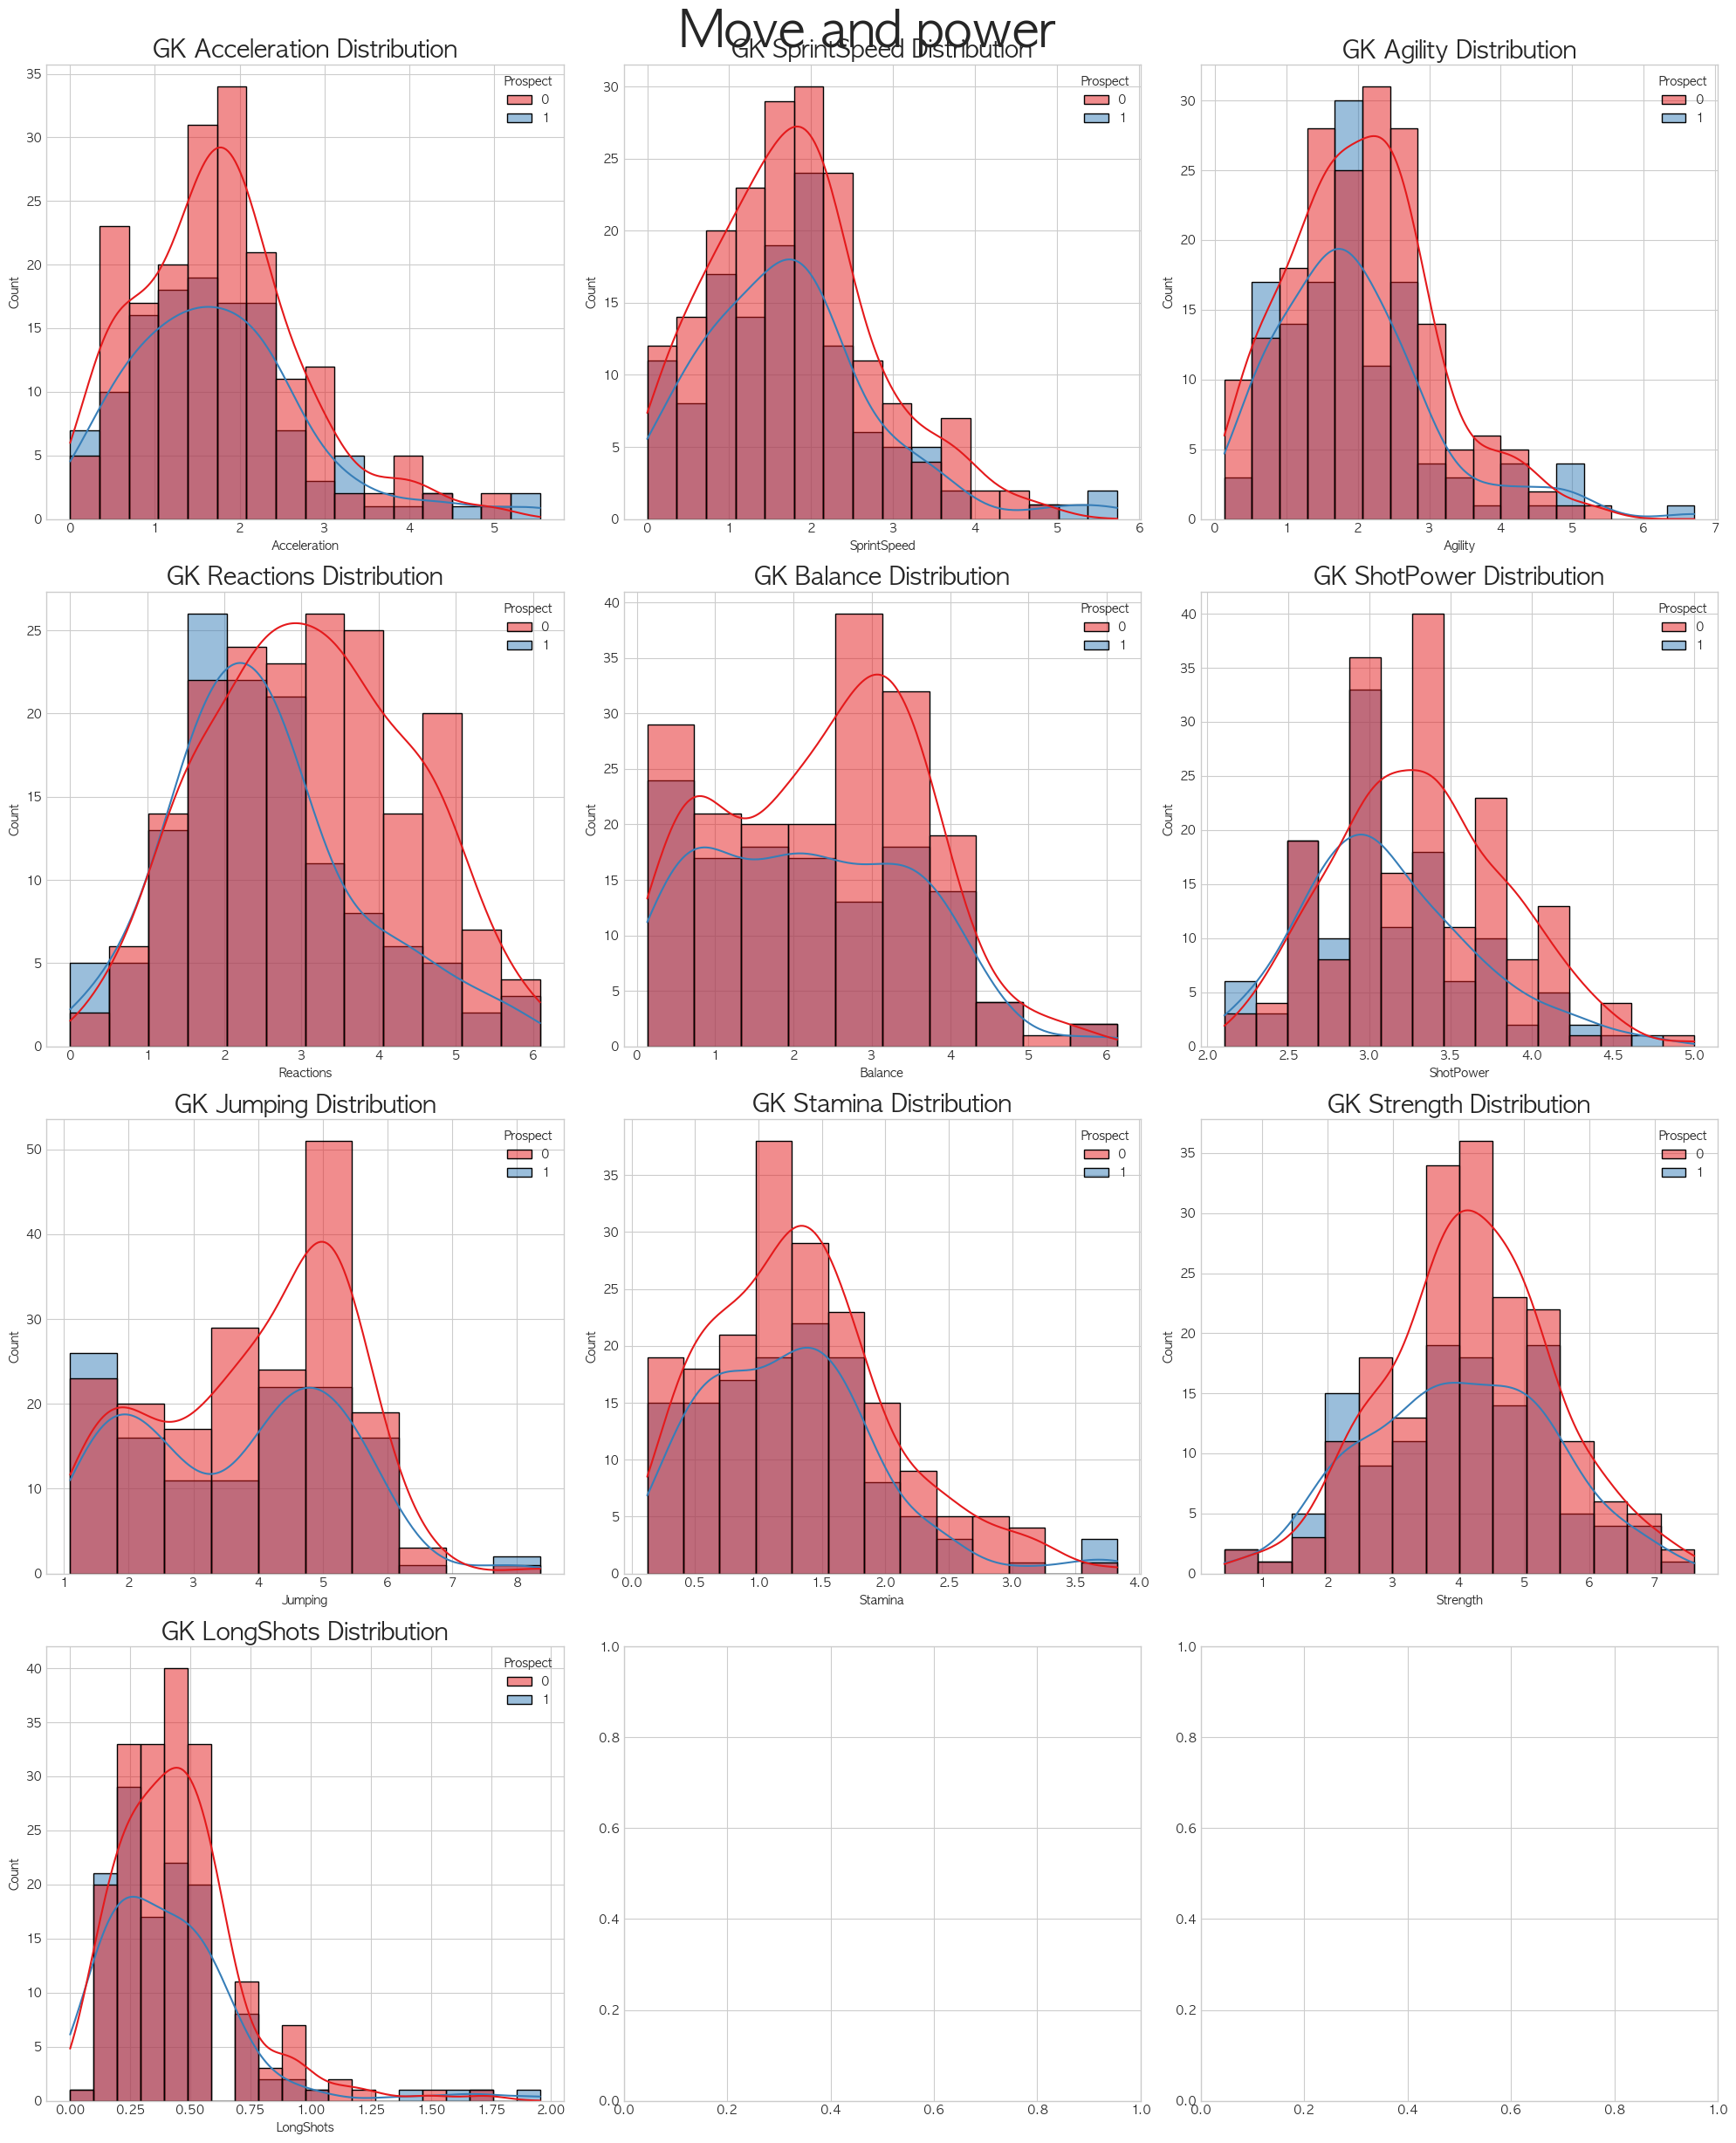

In [110]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots'
]

# 2. 도화지 준비 (4줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(4, 3, figsize=(20, 25)) 
axes = axes.flatten() 
fig.suptitle('Move and power', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

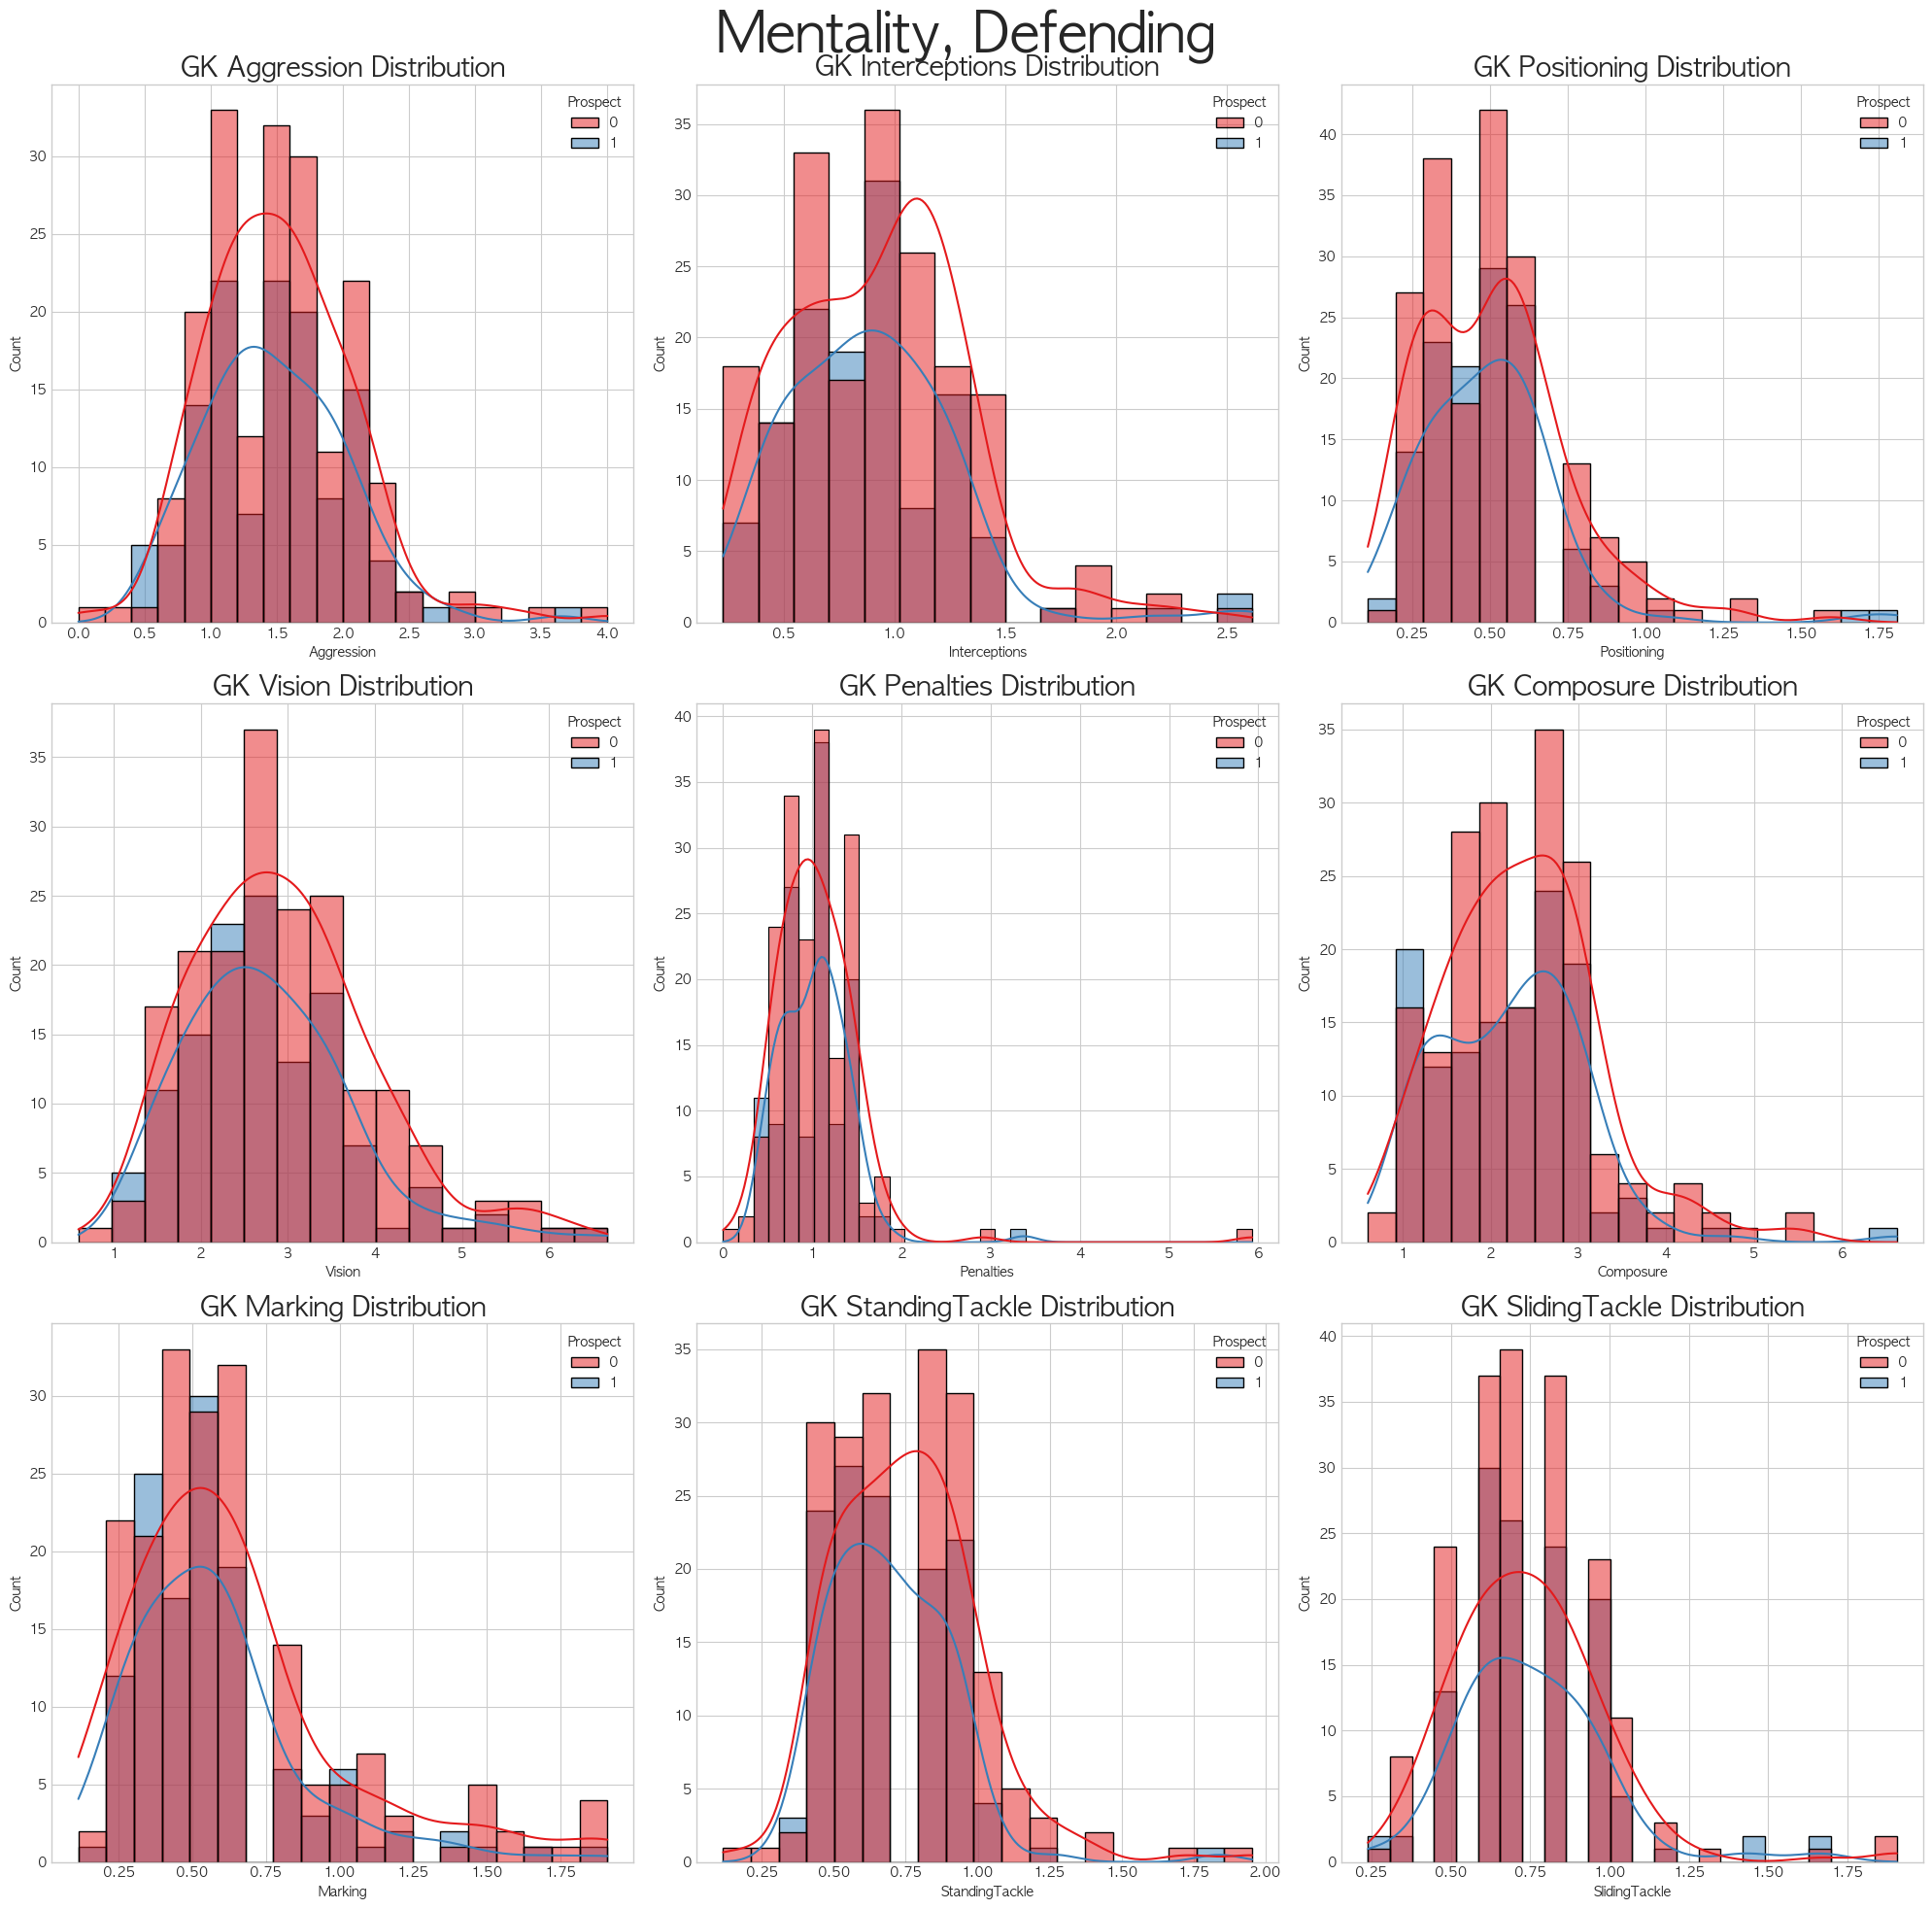

In [111]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
    'Marking', 'StandingTackle', 'SlidingTackle'
]

# 2. 도화지 준비 (3줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(3, 3, figsize=(20, 20)) 
axes = axes.flatten() 
fig.suptitle('Mentality, Defending', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'GK {col} Distribution', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

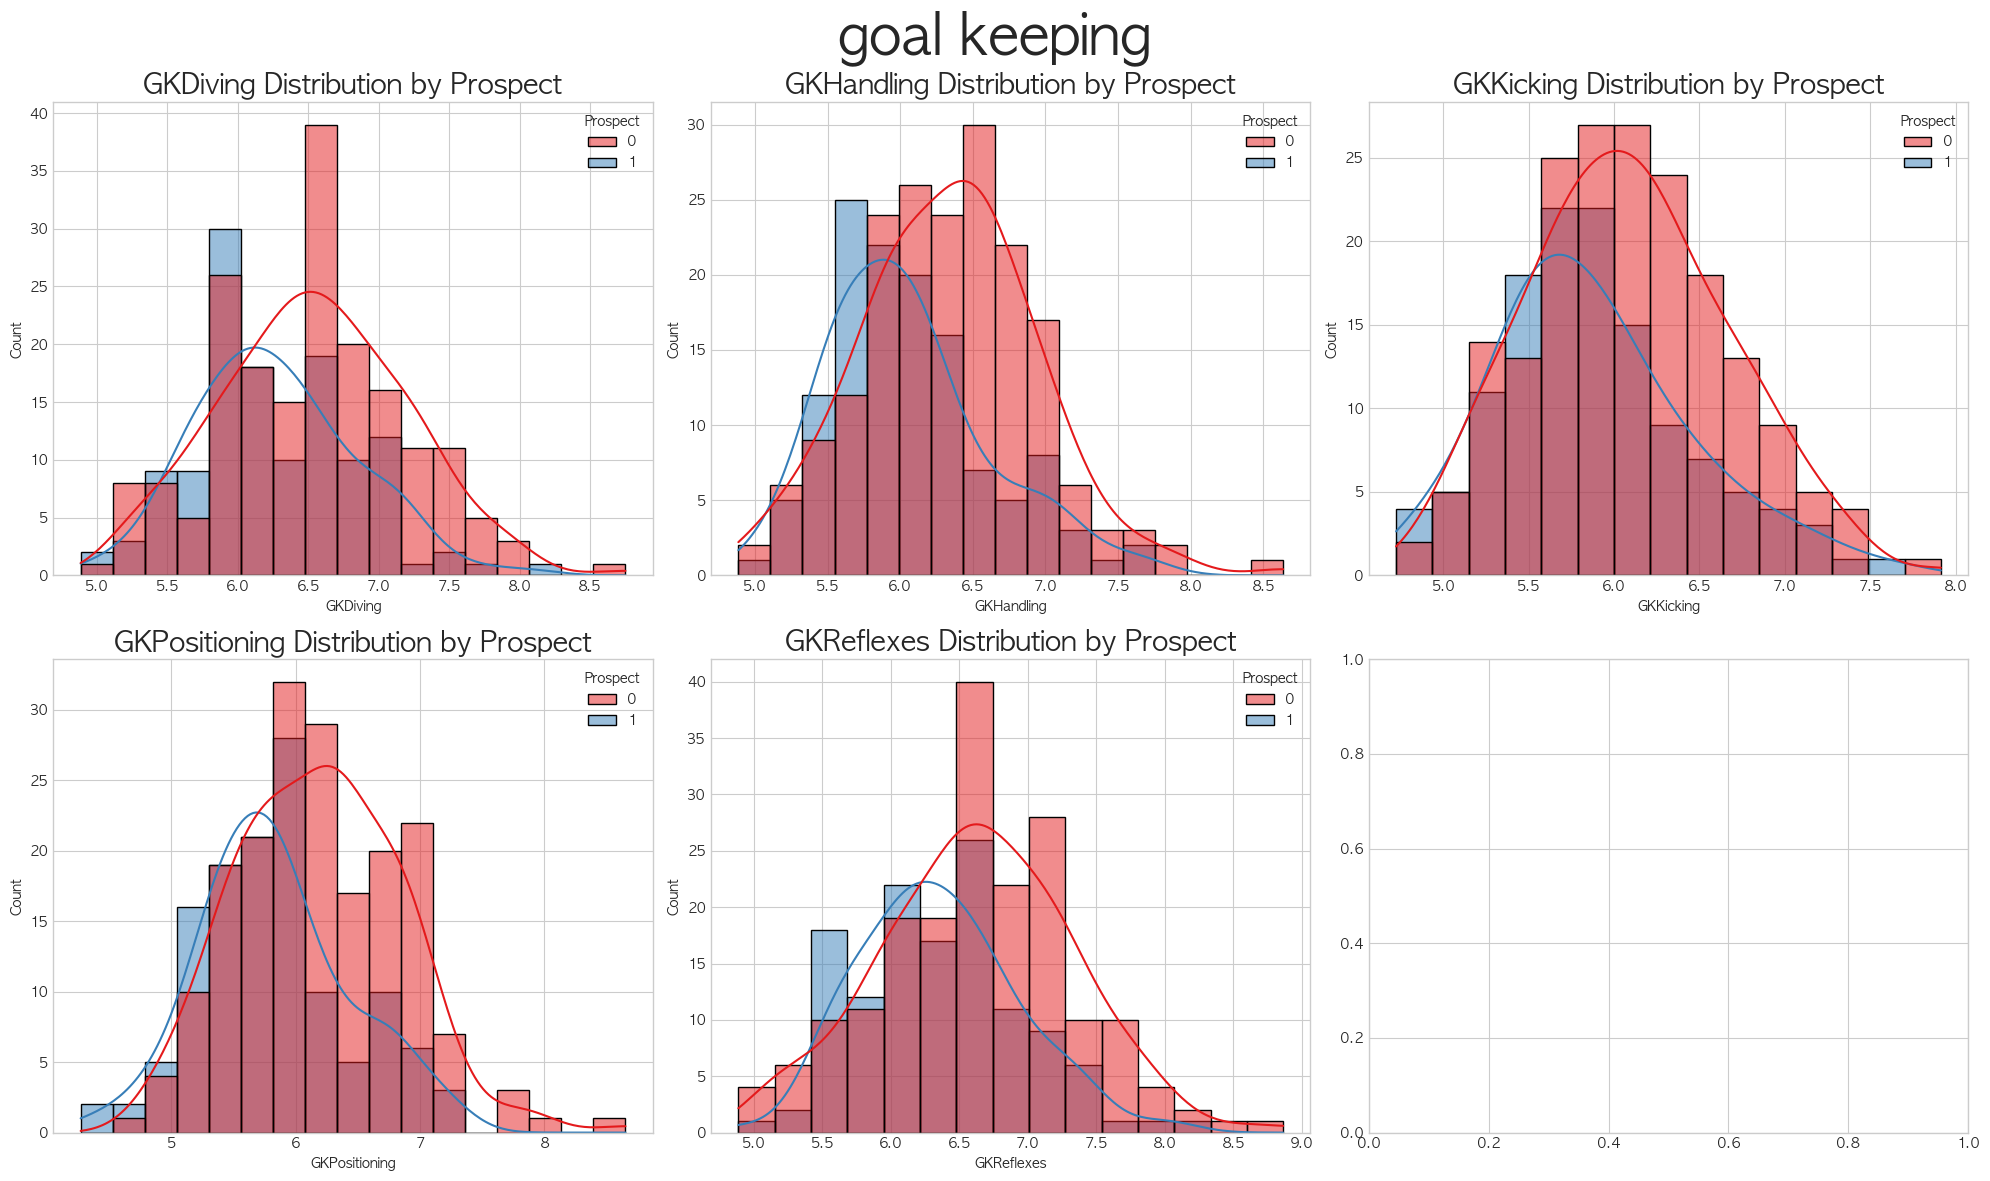

In [112]:
# 1. 그리고 싶은 컬럼 이름들을 리스트로 만듭니다 (6개)
total_columns = [
   'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
]

# 2. 도화지 준비 (2줄 3칸 = 총 6개 그래프)
fig, axes = plt.subplots(2, 3, figsize=(20, 12)) 
axes = axes.flatten() 
fig.suptitle('goal keeping', fontsize=40, fontweight='bold')
# 3. 반복문으로 6개를 후다닥 그리기
for i, col in enumerate(total_columns):
    sns.histplot(
        data=train, 
        x=col, 
        hue='Prospect',      # [핵심] 타겟 변수(0, 1)로 색깔 나누기
        kde=True,            # 곡선 추가
        ax=axes[i], 
        palette='Set1',      # [수정] 빨강(1) vs 파랑(0) 색상 조합
        alpha=0.5            # [추가] 겹친 부분이 잘 보이게 투명도 설정
    )
    
    # 제목 설정
    axes[i].set_title(f'{col} Distribution by Prospect', fontsize=20)

# 4. 마무리 (레이아웃 깔끔하게)
plt.tight_layout()
plt.show()

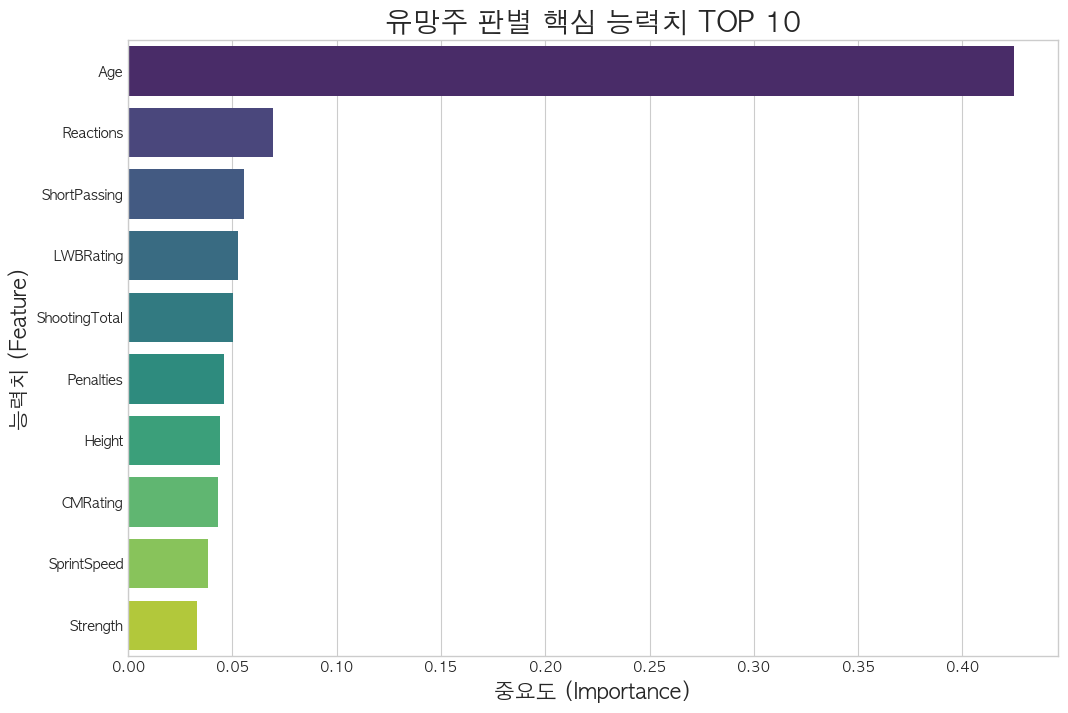

In [113]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 준비 (숫자만 사용, ID 같은 건 뺌)
# 유망주(Prospect)를 맞추기 위해 필요한 정보(X)와 정답(y)을 나눕니다.
numeric_cols = train.select_dtypes(include=['number']).columns
X = train[numeric_cols].drop(['Prospect', 'ID'], axis=1, errors='ignore') # 정답이랑 ID 제외
y = train['Prospect']

# 빈칸(NaN)이 있으면 에러 나니까 0으로 채워줍니다 (간단 버전)
X = X.fillna(0)

# 3. 모델 학습 (AI야, 공부해!)
# max_depth=5: 너무 복잡하게 생각하지 말고 핵심만 5단계로 파악해봐
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X, y)

# 4. 중요도 뽑기
importances = model.feature_importances_
feature_names = X.columns

# 보기 좋게 표로 정리
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10) # TOP 10만 뽑기

# 5. 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title('유망주 판별 핵심 능력치 TOP 10', fontsize=20, fontweight='bold')
plt.xlabel('중요도 (Importance)', fontsize=15)
plt.ylabel('능력치 (Feature)', fontsize=15)
plt.show()

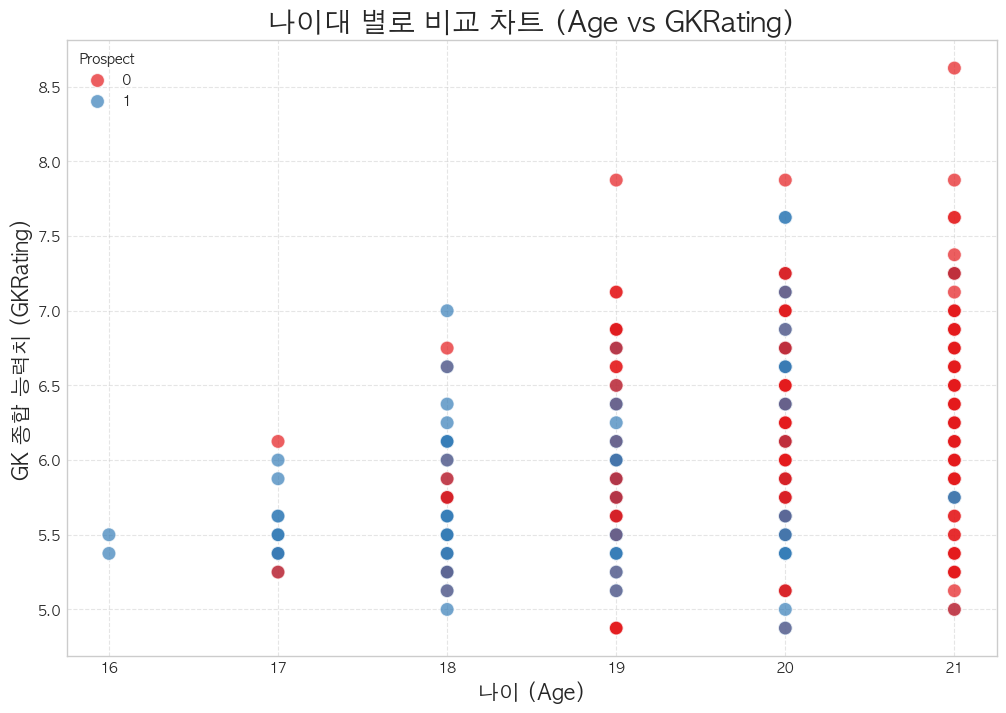

In [114]:
# 산점도 그리기 (나이 vs GKRating)
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=train, 
    x='Age', 
    y='GKRating',      # GK 종합 능력치
    hue='Prospect',    # 색깔 구분 (0 vs 1)
    palette='Set1',    # 빨강/파랑
    s=100,             # 점 크기 키움
    alpha=0.7          # 투명도
)

plt.title('나이대 별로 비교 차트 (Age vs GKRating)', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('GK 종합 능력치 (GKRating)', fontsize=15)

# 나이 칸이 딱딱 떨어지게 설정
plt.xticks([16, 17, 18, 19, 20, 21]) 

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

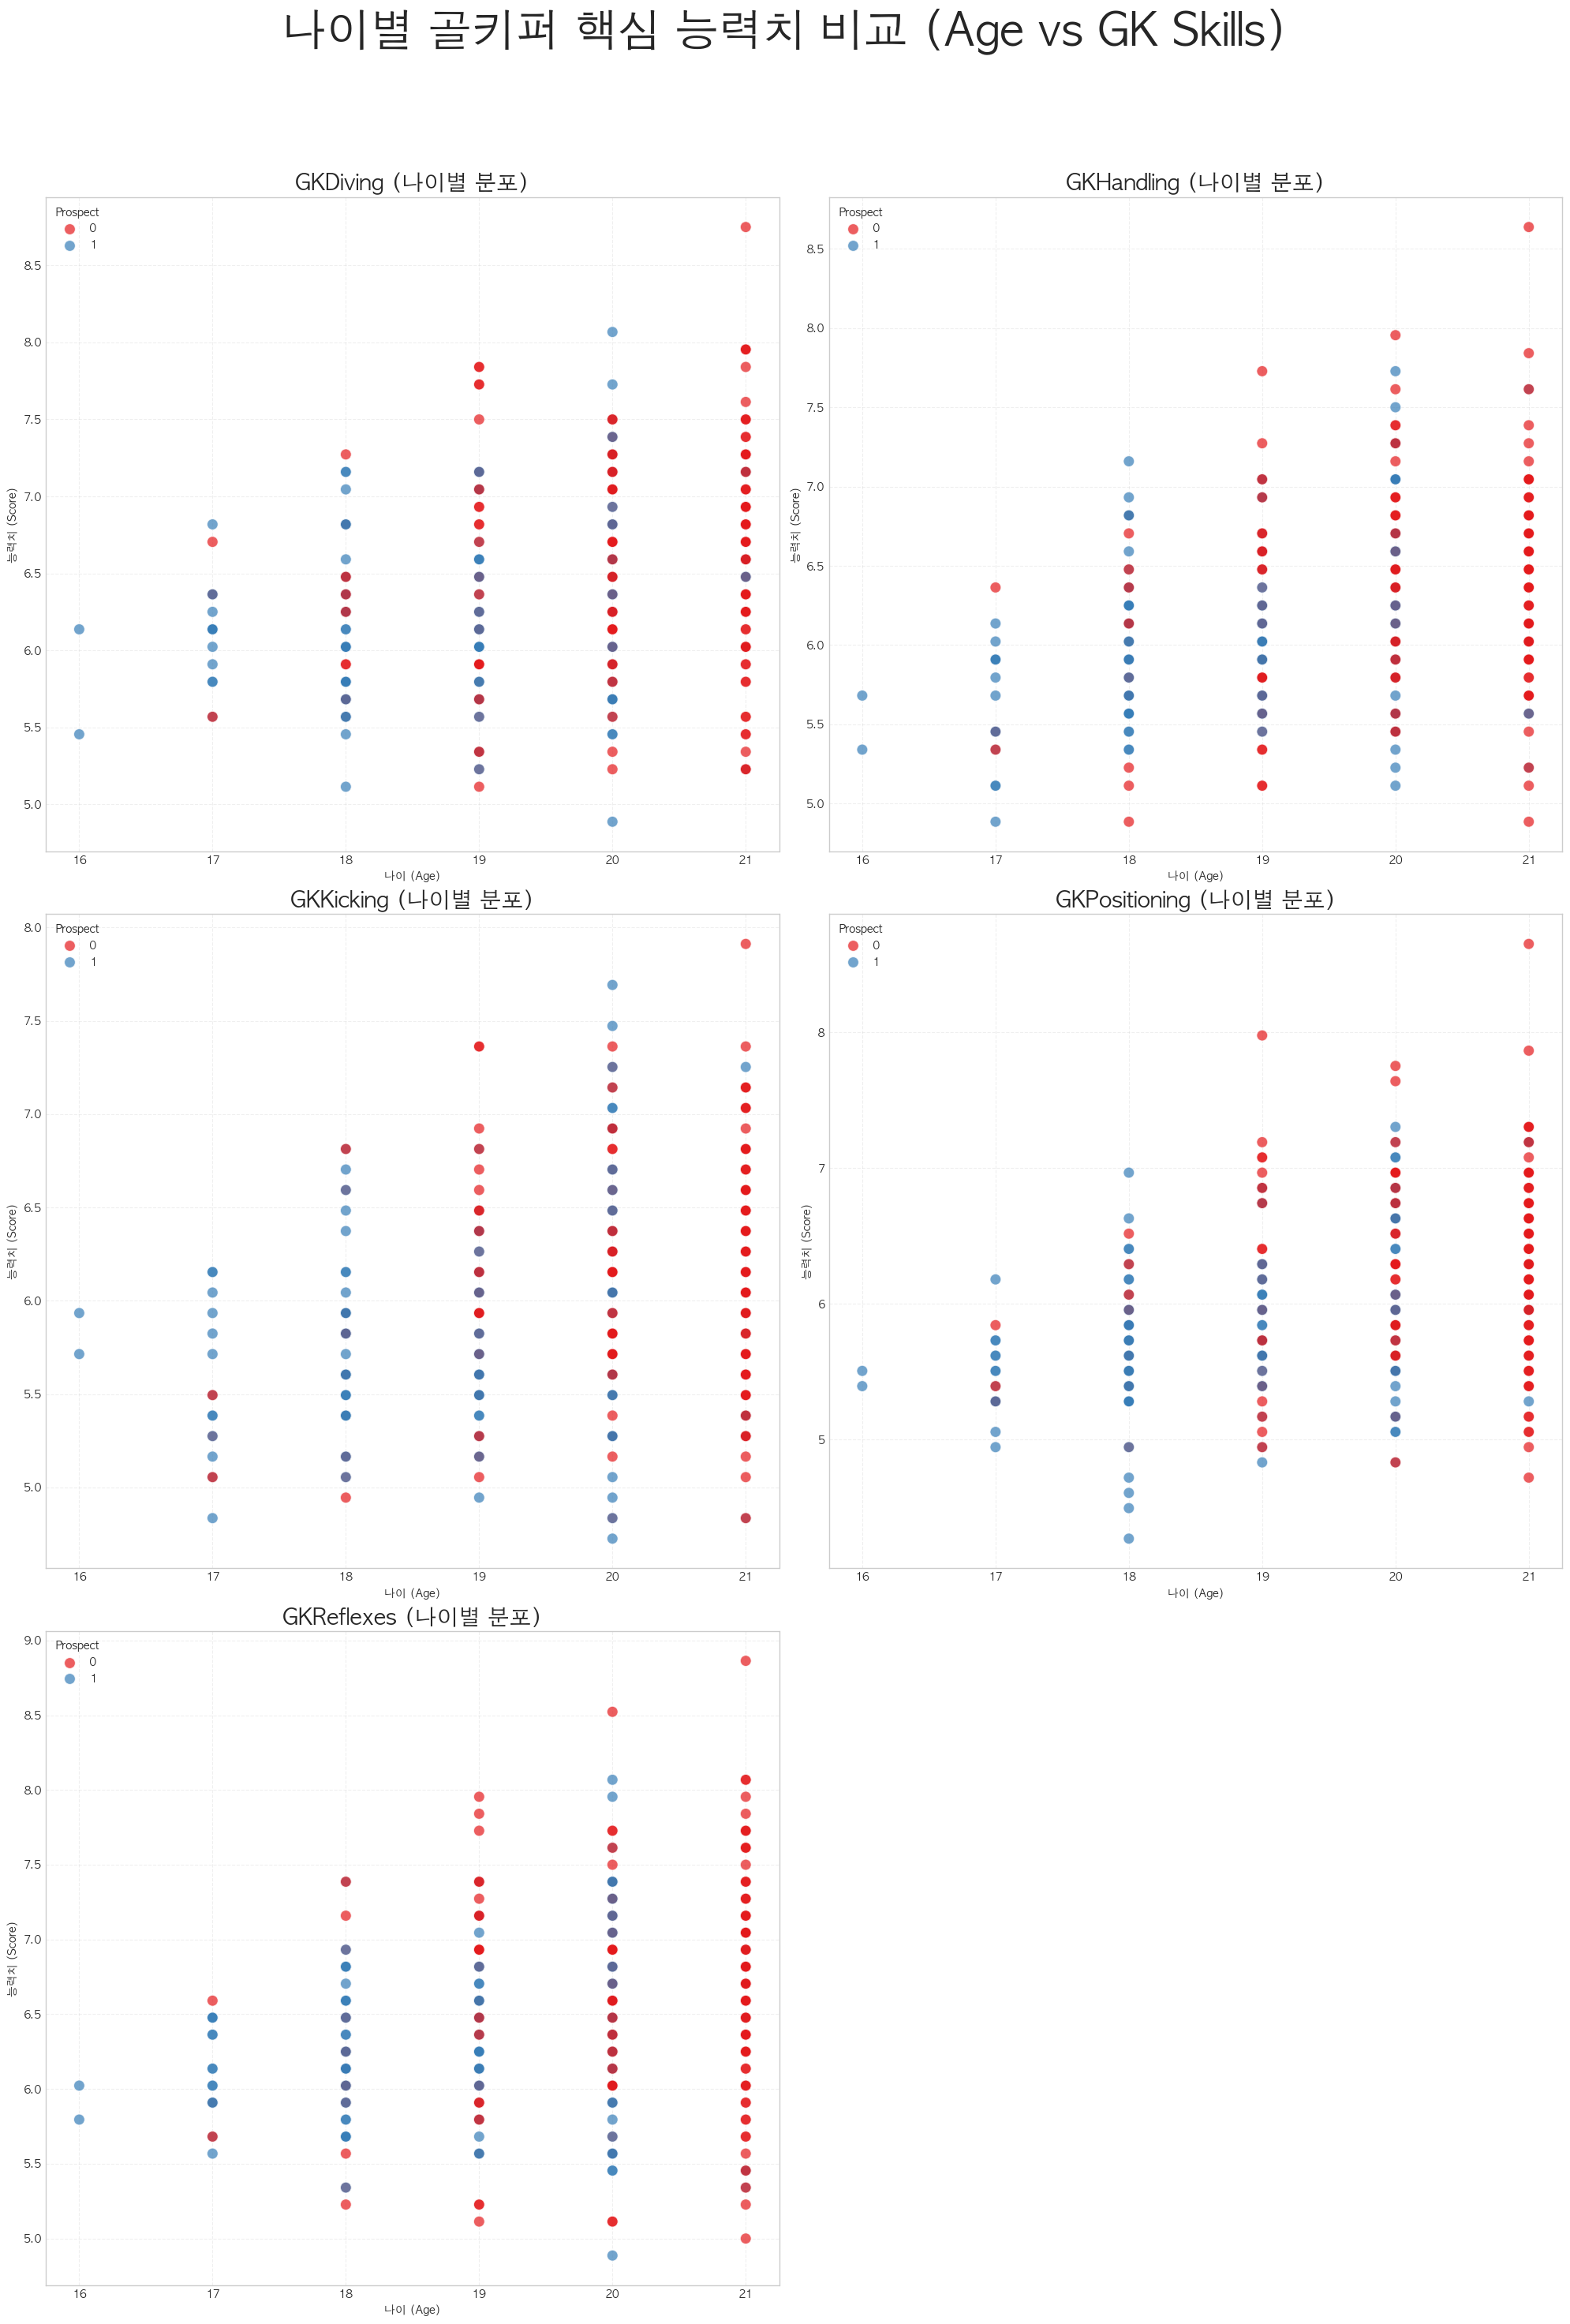

In [115]:
# 2. 분석할 5대 골키퍼 능력치 리스트
gk_cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

# 3. 도화지 준비 (2줄 3칸 = 총 6칸 중 5칸 사용)
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten() # 편하게 번호로 쓰기 위해 1줄로 펼침

# 큰 제목 달기
fig.suptitle('나이별 골키퍼 핵심 능력치 비교 (Age vs GK Skills)', fontsize=40, fontweight='bold')

# 4. 반복문으로 5개 그래프 후다닥 그리기
for i, col in enumerate(gk_cols):
    sns.scatterplot(
        data=train, 
        x='Age', 
        y=col, 
        hue='Prospect',    # 핵심: 유망주(1)와 비유망주(0) 색깔 다르게!
        palette='Set1',    # 빨강 vs 파랑
        alpha=0.7,         # 점을 살짝 투명하게 해서 겹친 것도 보이게
        s=100,              # 점 크기
        ax=axes[i]
    )
    
    # 그래프 꾸미기
    axes[i].set_title(f'{col} (나이별 분포)', fontsize=20)
    axes[i].set_xlabel('나이 (Age)')
    axes[i].set_ylabel('능력치 (Score)')
    axes[i].grid(True, linestyle='--', alpha=0.3) # 격자 무늬 추가

# 5. 남는 6번째 칸(빈칸)은 깔끔하게 삭제
fig.delaxes(axes[5])

# 마무리
plt.tight_layout()
plt.subplots_adjust(top=0.9) # 큰 제목이랑 안 겹치게 간격 조절
plt.show()

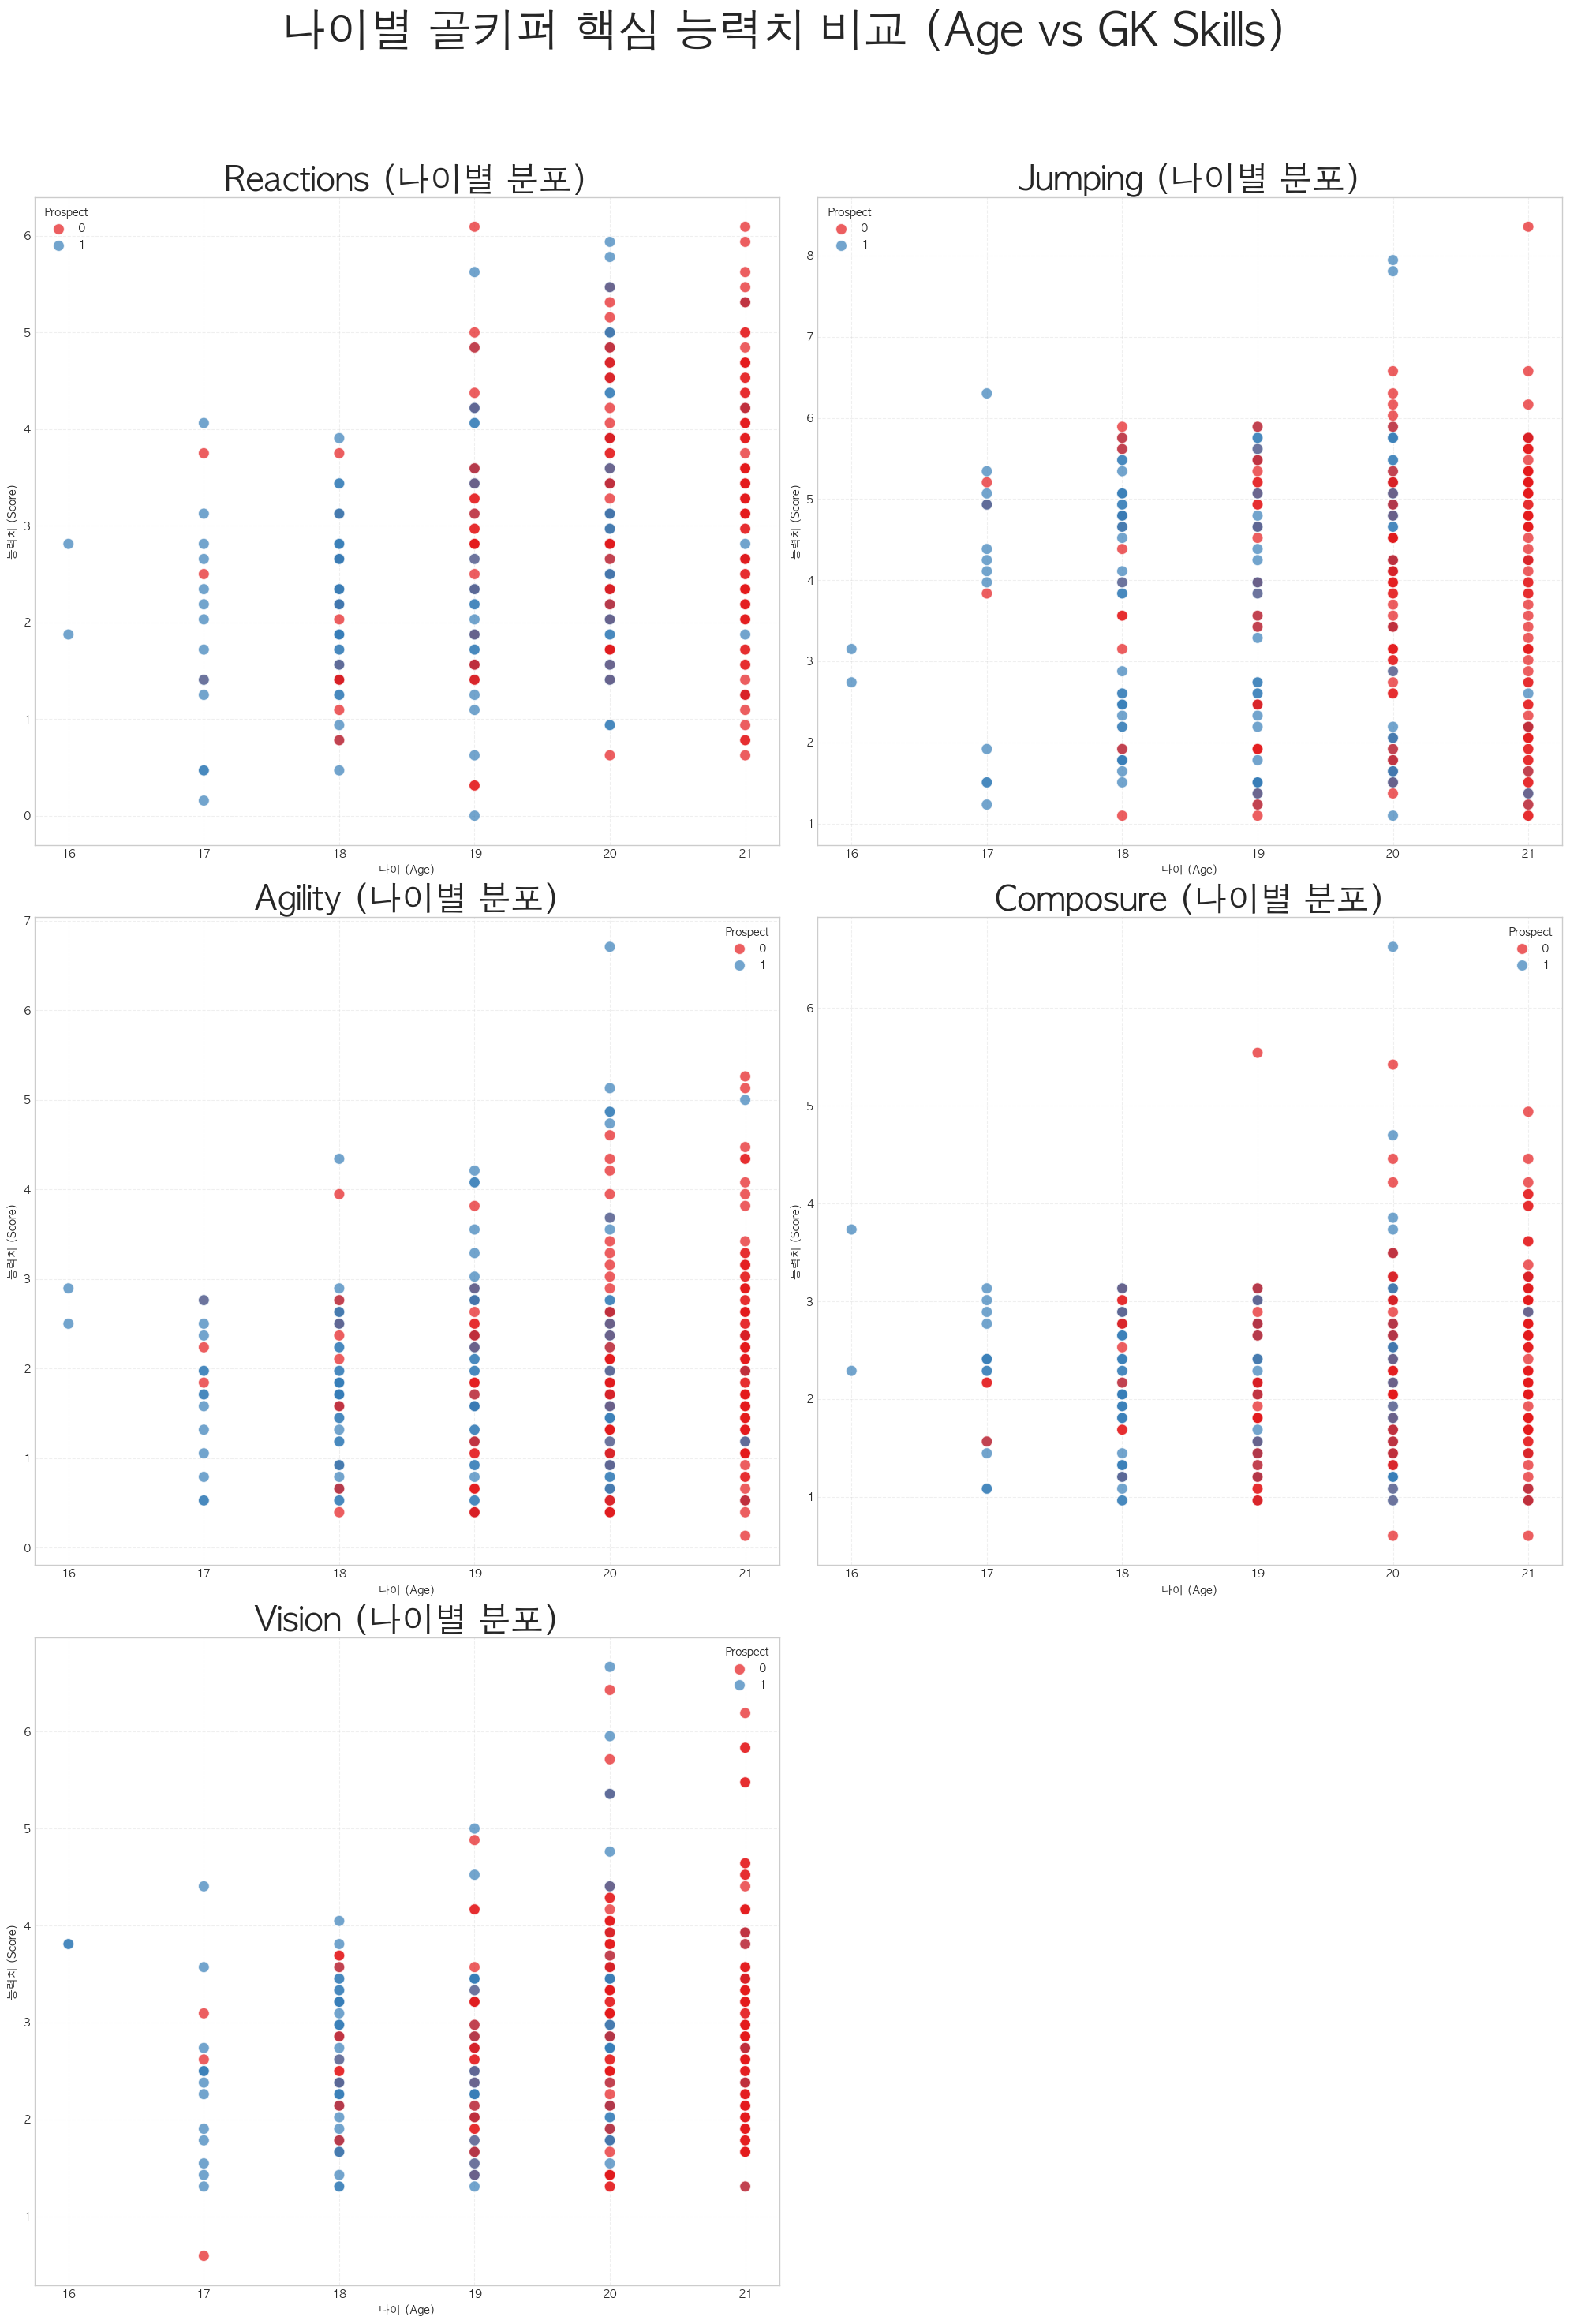

In [116]:
# 2. 분석할 5대 골키퍼 능력치 리스트
gk_cols = ['Reactions', 'Jumping', 'Agility', 'Composure', 'Vision']

# 3. 도화지 준비 (2줄 3칸 = 총 6칸 중 5칸 사용)
fig, axes = plt.subplots(3, 2, figsize=(20, 30))
axes = axes.flatten() # 편하게 번호로 쓰기 위해 1줄로 펼침

# 큰 제목 달기
fig.suptitle('나이별 골키퍼 핵심 능력치 비교 (Age vs GK Skills)', fontsize=40, fontweight='bold')

# 4. 반복문으로 5개 그래프 후다닥 그리기
for i, col in enumerate(gk_cols):
    sns.scatterplot(
        data=train, 
        x='Age', 
        y=col, 
        hue='Prospect',    # 핵심: 유망주(1)와 비유망주(0) 색깔 다르게!
        palette='Set1',    # 빨강 vs 파랑
        alpha=0.7,         # 점을 살짝 투명하게 해서 겹친 것도 보이게
        s=100,              # 점 크기
        ax=axes[i]
    )
    
    # 그래프 꾸미기
    axes[i].set_title(f'{col} (나이별 분포)', fontsize=30)
    axes[i].set_xlabel('나이 (Age)')
    axes[i].set_ylabel('능력치 (Score)')
    axes[i].grid(True, linestyle='--', alpha=0.3) # 격자 무늬 추가

# 5. 남는 6번째 칸(빈칸)은 깔끔하게 삭제
fig.delaxes(axes[5])

# 마무리
plt.tight_layout()
plt.subplots_adjust(top=0.9) # 큰 제목이랑 안 겹치게 간격 조절
plt.show()

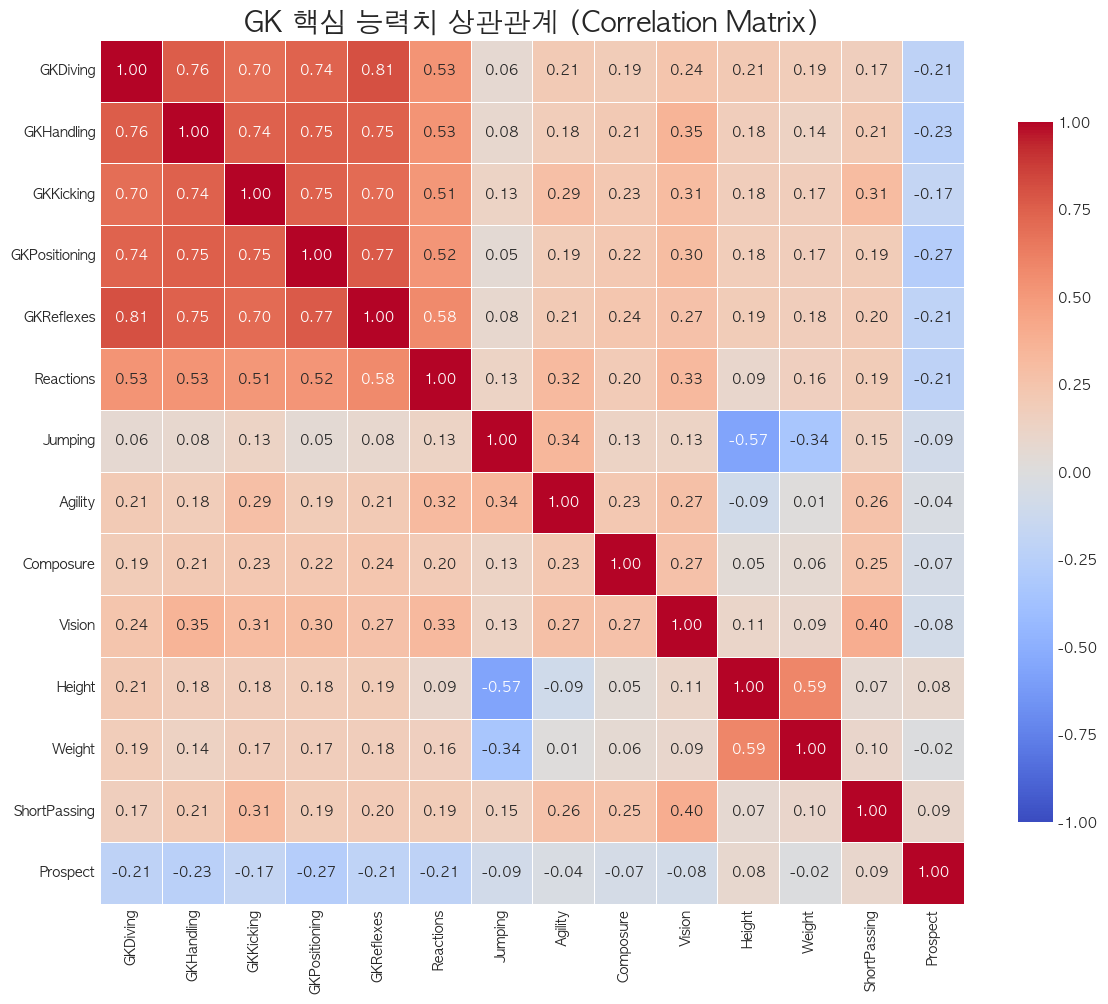

In [117]:
# 2. 분석할 컬럼 리스트 (요청하신 10개)
corr_cols = [
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
    'Reactions', 'Jumping', 'Agility', 'Composure', 'Vision','Height','Weight','ShortPassing','Prospect'
]

# 3. 상관관계 계산 (골키퍼 데이터만 사용)
# 이미 train은 GK만 필터링되어 있다고 가정하지만, 혹시 모르니 안전하게 한 번 더 필터링
gk_corr = train[train['Position'] == 'GK'][corr_cols].corr()

# 4. 히트맵 그리기
plt.figure(figsize=(12, 10))

sns.heatmap(
    gk_corr, 
    annot=True,         # 숫자 표시
    fmt='.2f',          # 소수점 2자리까지
    cmap='coolwarm',    # 빨강(양의 상관관계) vs 파랑(음의 상관관계)
    vmin=-1, vmax=1,    # 색상 범위 고정 (-1 ~ 1)
    square=True,        # 정사각형 모양 유지
    linewidths=0.5,     # 칸 사이 간격
    cbar_kws={"shrink": 0.8} # 컬러바 크기 조절
)

plt.title('GK 핵심 능력치 상관관계 (Correlation Matrix)', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

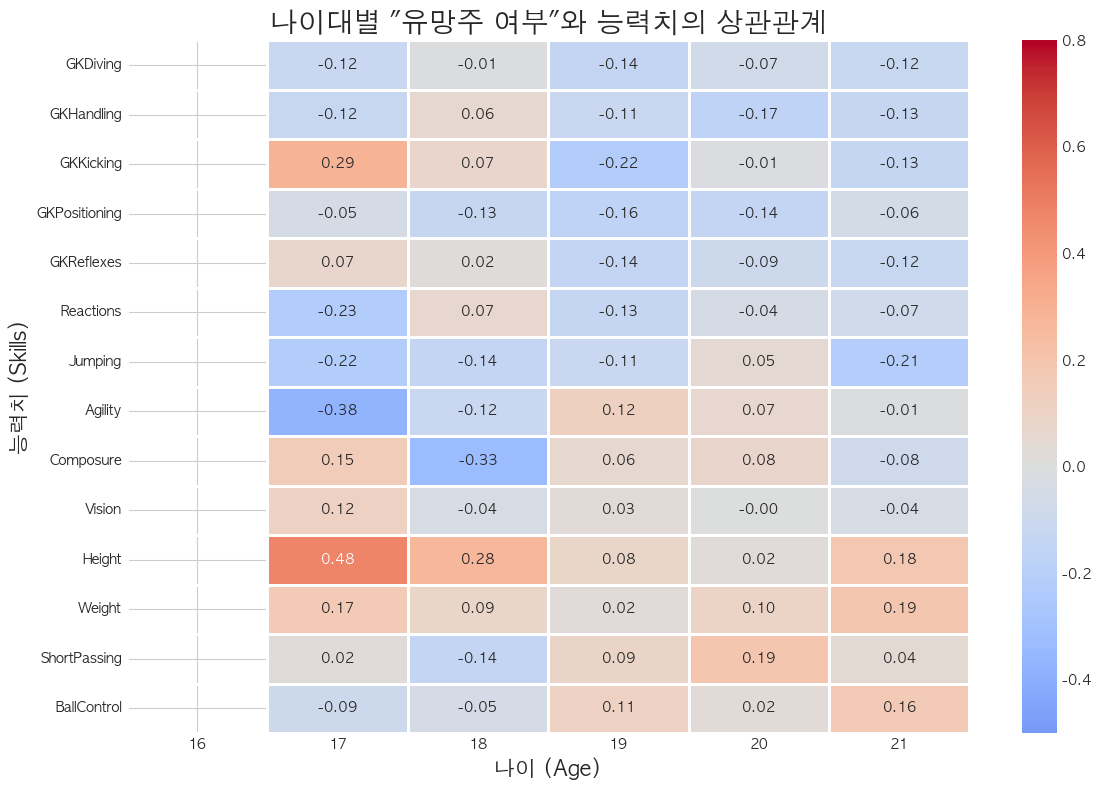

In [118]:

# 2. 분석할 컬럼 리스트
target_cols = [
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
    'Reactions', 'Jumping', 'Agility', 'Composure', 'Vision','Height','Weight','ShortPassing','BallControl'
]

# 3. [핵심] 나이별로 루프를 돌면서 상관계수를 따로 구해서 저장합니다.
age_corr_data = {}

# 데이터에 존재하는 나이들을 정렬해서 가져옴
ages = sorted(train['Age'].unique())

for age in ages:
    # 해당 나이의 선수들만 추출
    age_group = train[train['Age'] == age]
    
    # 데이터가 너무 적으면(1명 이하) 상관계수 계산 불가하므로 패스
    if len(age_group) > 1:
        # 각 능력치와 'Prospect(유망주)' 사이의 상관계수만 쏙 뽑음
        # corrwith는 특정 컬럼(Prospect)과의 상관관계만 계산해줌
        corr = age_group[target_cols].corrwith(age_group['Prospect'])
        age_corr_data[age] = corr

# 4. 데이터프레임으로 변환 (행: 능력치, 열: 나이)
age_corr_df = pd.DataFrame(age_corr_data)

# 5. 히트맵 그리기
plt.figure(figsize=(12, 8))

sns.heatmap(
    age_corr_df, 
    annot=True,         # 숫자 표시
    fmt='.2f', 
    cmap='coolwarm',    # 빨강(양의 상관관계) vs 파랑
    center=0,           # 0을 기준으로 색 나눔
    vmin=-0.5, vmax=0.8, # 색상 범위 조절 (너무 연하면 범위를 좁히세요)
    linewidths=1
)

plt.title('나이대별 "유망주 여부"와 능력치의 상관관계', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('능력치 (Skills)', fontsize=15)
plt.tight_layout()
plt.show()

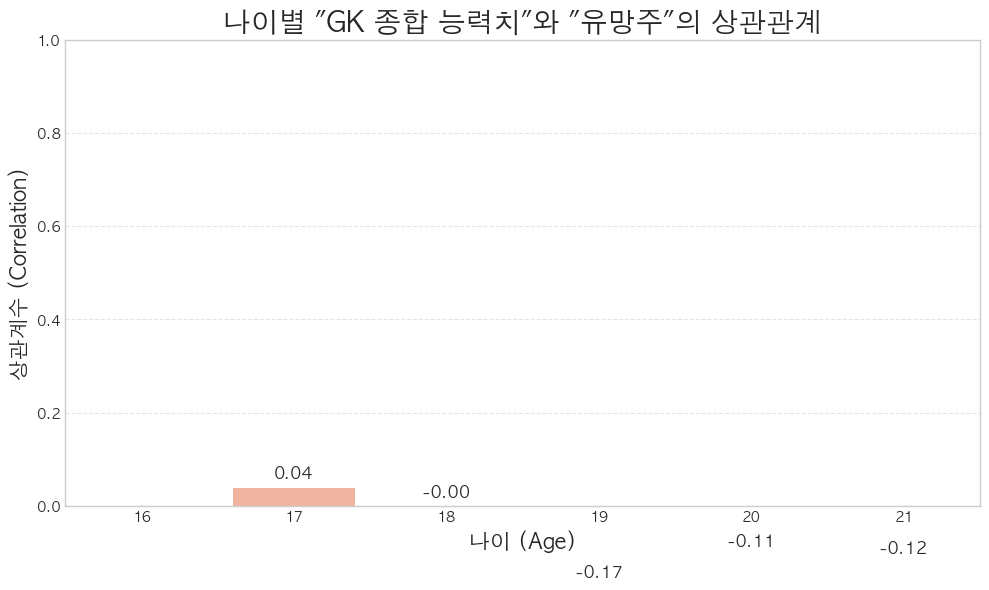

In [119]:

# 2. 데이터 준비
# (GK만 뽑고 복사본 만들기)
gk_df = train[train['Position'] == 'GK'].copy()

# 3. [핵심] 5대 능력치를 하나로 합칩니다! (평균 점수)
gk_cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
gk_df['GK_Core_Score'] = gk_df[gk_cols].mean(axis=1)

# 4. 나이별로 상관계수 계산하기
age_corr_data = []

ages = sorted(gk_df['Age'].unique())

for age in ages:
    # 해당 나이의 선수들만 추출
    group = gk_df[gk_df['Age'] == age]
    
    # 데이터가 2명 이상이어야 상관계수 계산 가능
    if len(group) > 1:
        # 'GK 종합 점수'와 '유망주 여부'의 상관관계 계산
        corr = group['GK_Core_Score'].corr(group['Prospect'])
        age_corr_data.append({'Age': age, 'Correlation': corr})

# 데이터프레임으로 변환
corr_df = pd.DataFrame(age_corr_data)

# 5. 그래프 그리기 (막대 그래프)
plt.figure(figsize=(10, 6))

# 색상: 상관관계가 높으면 진한 빨강, 낮으면 연하게
sns.barplot(
    data=corr_df, 
    x='Age', 
    y='Correlation', 
    palette='Reds' 
)

plt.title('나이별 "GK 종합 능력치"와 "유망주"의 상관관계', fontsize=20, fontweight='bold')
plt.xlabel('나이 (Age)', fontsize=15)
plt.ylabel('상관계수 (Correlation)', fontsize=15)
plt.ylim(0, 1.0) # 상관계수는 최대 1이니까 0~1 사이로 고정
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 값 표시 (막대 위에 숫자 써주기)
for i, v in enumerate(corr_df['Correlation']):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. 데이터 전처리

In [129]:
import pandas as pd
import numpy as np

# 1. 원본 데이터 불러오기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 2. 골키퍼(GK)만 뽑기 (Test 데이터도 GK만 남겨야겠죠?)
train_gk = train[train['Position'] == 'GK'].copy()
test_gk = test[test['Position'] == 'GK'].copy()

# ---------------------------------------------------------
# 1️⃣ 기준표 만들기 (Train 데이터로만!)
# ---------------------------------------------------------
# 5대 능력치 평균 컬럼 만들기 함수
def get_raw_average(df):
    cols = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
    return df[cols].mean(axis=1)

# Train에서 먼저 계산
train_gk['GK_Raw_Average'] = get_raw_average(train_gk)

# [핵심] "나이별 평균 점수표"를 Train에서 만듭니다. (이게 우리의 채점 기준표!)
age_standard = train_gk.groupby('Age')['GK_Raw_Average'].mean().to_dict()

# 만약 Test에 Train에 없는 나이가 있을 수도 있으니, 전체 평균도 하나 구해둡니다. (비상용)
global_mean = train_gk['GK_Raw_Average'].mean()

# ---------------------------------------------------------
# 2️⃣ 전처리 적용 함수 (Train, Test 똑같이 적용)
# ---------------------------------------------------------
def preprocessing(df, is_train=True):
    # (1) 기본 실력 평균 계산
    df['GK_Raw_Average'] = get_raw_average(df)
    
    # (2) Genius Score: 미리 만든 'age_standard' 기준표를 보고 점수를 매깁니다.
    # map 함수가 기준표에서 나이에 맞는 평균을 찾아줍니다. 없으면 전체 평균(global_mean) 사용.
    df['Age_Group_Mean'] = df['Age'].map(age_standard).fillna(global_mean)
    df['Genius_Score'] = df['GK_Raw_Average'] - df['Age_Group_Mean']
    
    # (3) Physical Power
    df['Physical_Power'] = df['Height'] + (df['Weight'] * 0.5)
    
    # (4) BuildUp Score
    df['BuildUp_Score'] = (df['BallControl'] + df['ShortPassing'] + df['Vision']) / 3
    df['Physical_/_Age'] = df['Physical_Power'] / df['Age']

    df['Age_squared'] = df['Age'] ** 5
    # (5) 컬럼 정리
    features = [
        'ID',              # ID는 나중에 제출할 때 필수!
        #'Genius_Score', 
        'Height', 
        #'BuildUp_Score', 
        'Physical_Power', 
        'Age',
        'Age_squared',
        'Physical_/_Age'
    ]
    
    # Train에는 정답(Prospect)이 있고, Test에는 없으니까 구분해서 처리
    if is_train:
        return df[features + ['Prospect']]
    else:
        return df[features] # Test는 정답 없이 반환

# ---------------------------------------------------------
# 3️⃣ 실행!
# ---------------------------------------------------------
final_train = preprocessing(train_gk, is_train=True)
final_test = preprocessing(test_gk, is_train=False)

# 확인
print(f"Train 데이터 개수: {len(final_train)}")
print(f"Test 데이터 개수: {len(final_test)}")

print("\n=== 최종 Train 데이터 (상위 10개) ===")
display(final_train.head(10))

print("\n=== 최종 Test 데이터 (상위 10개) ===")
display(final_test.head(10))

Train 데이터 개수: 314
Test 데이터 개수: 195

=== 최종 Train 데이터 (상위 10개) ===


,ID,Height,Physical_Power,Age,Age_squared,Physical_/_Age,Prospect
6,TRAIN_0006,196,237.0,20,3200000,11.850000,0
29,TRAIN_0029,193,230.5,17,1419857,13.558824,1
35,TRAIN_0035,188,222.0,17,1419857,13.058824,1
36,TRAIN_0036,183,218.0,21,4084101,10.380952,0
40,TRAIN_0040,194,236.5,21,4084101,11.261905,0
50,TRAIN_0050,197,239.0,20,3200000,11.950000,1
58,TRAIN_0058,194,233.5,21,4084101,11.119048,1
62,TRAIN_0062,198,239.0,16,1048576,14.937500,1
86,TRAIN_0086,183,219.0,17,1419857,12.882353,1
93,TRAIN_0093,193,234.5,17,1419857,13.794118,1



=== 최종 Test 데이터 (상위 10개) ===


,ID,Height,Physical_Power,Age,Age_squared,Physical_/_Age
0,TEST_0000,184,221.5,17,1419857,13.029412
34,TEST_0034,185,227.0,21,4084101,10.809524
39,TEST_0039,190,232.5,21,4084101,11.071429
47,TEST_0047,186,228.5,18,1889568,12.694444
48,TEST_0048,184,222.0,21,4084101,10.571429
50,TEST_0050,197,240.5,21,4084101,11.452381
53,TEST_0053,182,220.0,19,2476099,11.578947
61,TEST_0061,190,231.5,21,4084101,11.023810
82,TEST_0082,195,237.5,21,4084101,11.309524
102,TEST_0102,188,231.0,21,4084101,11.000000


=== 📋 유망주(Prospect)와의 상관관계 순위표 ===
Physical_/_Age    0.477675
Height            0.084893
Physical_Power    0.052986
Age              -0.484146
Age_squared      -0.490586
Name: Prospect, dtype: float64


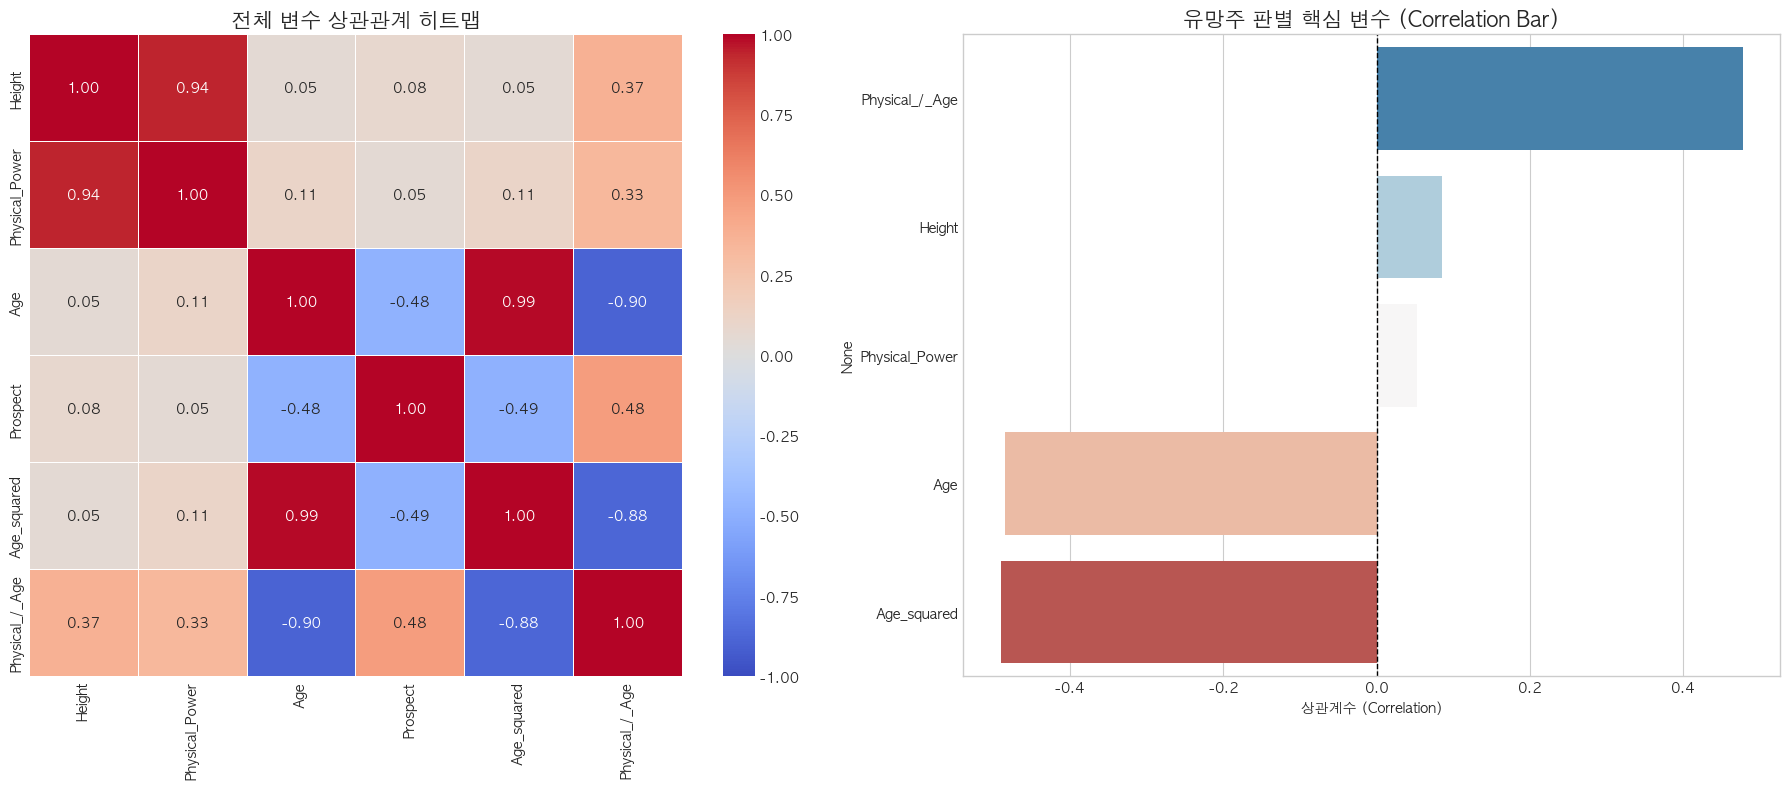

In [130]:
# 1. 폰트 설정 (Mac 사용자용)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# ---------------------------------------------------------
# 📊 1. 상관관계 표 (숫자로 확인하기)
# ---------------------------------------------------------
# ID는 제외하고, 분석할 핵심 변수들만 뽑습니다.
analysis_cols = [
    #'Genius_Score',    # 나이 보정 실력
    'Height',          # 키
    #'BuildUp_Score',   # 발밑 능력
    'Physical_Power',  # 피지컬 종합
    'Age',             # 나이
    'Prospect',         # 정답 (타겟)
    'Age_squared',
    'Physical_/_Age'
]

# 상관계수 행렬 계산
corr_matrix = final_train[analysis_cols].corr()

print("=== 📋 유망주(Prospect)와의 상관관계 순위표 ===")
# 유망주와 관련된 순서대로 정렬해서 보여줍니다.
print(corr_matrix['Prospect'].drop('Prospect').sort_values(ascending=False))


# ---------------------------------------------------------
# 📈 2. 그래프 그리기 (히트맵 + 막대그래프)
# ---------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# (1) 히트맵 (전체 변수끼리의 관계)
# 빨갈수록 양의 상관관계, 파랄수록 음의 상관관계
sns.heatmap(
    corr_matrix, 
    annot=True,         # 숫자 표시
    fmt='.2f',          # 소수점 2자리
    cmap='coolwarm',    # 색상 (파랑~빨강)
    vmin=-1, vmax=1,    # 범위 고정
    linewidths=0.5,
    ax=axes[0]
)
axes[0].set_title('전체 변수 상관관계 히트맵', fontsize=15, fontweight='bold')

# (2) 막대 그래프 (유망주 결정 요인 순위)
# 'Prospect'와의 상관관계만 뽑아서 막대로 그립니다.
target_corr = corr_matrix['Prospect'].drop('Prospect').sort_values(ascending=False)

sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdBu_r', ax=axes[1])
axes[1].set_title('유망주 판별 핵심 변수 (Correlation Bar)', fontsize=15, fontweight='bold')
axes[1].set_xlabel('상관계수 (Correlation)')
axes[1].axvline(0, color='black', linestyle='--', linewidth=1) # 0점 기준선

# 그래프 출력
plt.tight_layout()
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# 사용할 8개 모델 임포트
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. 데이터 준비 (final_train 사용)
# ID 컬럼이 있다면 제거, 없다면 그대로 사용
if 'ID' in final_train.columns:
    X = final_train.drop(columns=['ID', 'Prospect'])
else:
    X = final_train.drop(columns=['Prospect'])
y = final_train['Prospect']

# 2. 학습/검증 데이터 분리 (8:2)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. 8가지 모델 정의
models = {
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# 4. 모델 학습 및 평가 출력
print(f"{'Model':<20} {'Accuracy':<10} {'F1-Score':<10}")
print("=" * 45)

for name, model in models.items():
    # 학습
    model.fit(X_train, y_train)
    # 예측
    pred = model.predict(X_val)
    
    # 평가
    acc = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    
    print(f"{name:<20} {acc:.4f}     {f1:.4f}")

Model                Accuracy   F1-Score  
LogisticRegression   0.7302     0.6383
DecisionTree         0.7619     0.6809
RandomForest         0.7619     0.6939
ExtraTrees           0.7460     0.6800
GradientBoosting     0.7460     0.6667
AdaBoost             0.7619     0.6667
XGBoost              0.7778     0.7083
LightGBM             0.7460     0.6923
